In [1]:
cd '/Users/alighofrani/Desktop/Paper1'

/Users/alighofrani/Desktop/paper1


In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
#np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "/Users/alighofrani/Desktop/Paper1"
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import pandas as pd
import scipy.stats as stats
#import researchpy as rp
import statsmodels.api as sm
#from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [4]:
Data_Info = pd.read_excel("Data.xlsx",sheet_name="Attributes", index_col=None)
Data_raw = pd.read_excel("Data.xlsx",sheet_name="Data", 
                         names=Data_Info["Attribute"],index_col=None)

# Impute Family Age by Inserting Zeros

In [5]:
from sklearn.impute import SimpleImputer
#impute age of family
imp = SimpleImputer(missing_values=np.nan, strategy="constant", fill_value=0)
imp_med = SimpleImputer(missing_values=np.nan, strategy="median")
Data_raw.values[:,8:15] = imp.fit_transform(Data_raw.values[:,8:15])
Data_raw = pd.DataFrame(Data_raw.values, columns=Data_Info["Attribute"])

# Imputing Columns with Median Values

In [19]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp_iter = IterativeImputer(max_iter=10, random_state=0)
Data_raw.values[:,:4] = imp_iter.fit_transform(Data_raw.values[:,:4]).astype(int)
# data_imputed.values[:,:8] = imp_med.fit_transform(data_median_imp.values[:,:8])
# data_imputed.values[:,15:] = imp_med.fit_transform(data_median_imp.values[:,15:])

# Seperating attitude 

In [ ]:
Data_Raw_Seperated_Attitude = np.empty([data_median_imp.shape[0],data_median_imp.shape[1]+4])
Data_Raw_Seperated_Attitude[:,:20] = data_median_imp.values[:,:20]
Data_Raw_Seperated_Attitude[:,25:] = data_median_imp.values[:,21:]
Data_Raw_Seperated_Attitude[:,21] = np.where(data_median_imp.values[:,20]==1,1,0)
Data_Raw_Seperated_Attitude[:,22] = np.where(data_median_imp.values[:,20]==2,1,0)
Data_Raw_Seperated_Attitude[:,23] = np.where(data_median_imp.values[:,20]==3,1,0)
Data_Raw_Seperated_Attitude[:,24] = np.where(data_median_imp.values[:,20]==4,1,0)
RevisedAttributes = pd.read_excel("Data.xlsx",sheet_name="RevisedAttributes", index_col=None)
Data_Imputed_addedAttitude = pd.DataFrame(Data_Raw_Seperated_Attitude.astype(int), 
                    columns=RevisedAttributes.Attribute)

# Adding Bill per SqMeter Feature

In [91]:
elec_replace = {1:250,2:750,3:1500,4:2500,5:4000,6:5000,7:8000,8:0, np.NaN:0}
Data_raw_replaced = Data_raw.replace({"ElecBill": elec_replace})

bill_per_sqMeter = Data_raw_replaced.ElecBill/Data_raw.Area
bill_per_sqMeter_mean = np.mean(bill_per_sqMeter.dropna())
bill_per_sqMeter_d = np.where(np.isnan(bill_per_sqMeter), bill_per_sqMeter_mean, bill_per_sqMeter)
Data_raw['ElecPerArea'] = bill_per_sqMeter_d

elec_replace = {8:0, np.NaN:0}
Data_raw_replaced = Data_raw.replace({"ElecBill": elec_replace})
bill_per_sqMeter_class = Data_raw_replaced.ElecBill/Data_raw_replaced.Area
bill_per_sqMeter_class_d = np.where(np.isnan(bill_per_sqMeter), 0, bill_per_sqMeter_class)
Data_raw['ElecPerArea_cat'] = bill_per_sqMeter_class_d

In [114]:
xx = (Data_raw['ElecPerArea_cat']*100000).astype(int)
xx.value_counts().to_excel('new.xlsx')

In [6]:
Data_Qatar = Data_raw[Data_raw.Nationality == 1].reset_index().drop('index', axis=1)
Data_NonQatar = Data_raw[Data_raw.Nationality != 1].reset_index().drop('index', axis=1)

# Compare Qatari and non-Qatari 

In [7]:
len(Data_Qatar), len(Data_NonQatar)

(1254, 1961)

# Nationalities

In [8]:
#Nationalities
Feature = "Nationality"
nation_labels = {1:'Qatari',2:'European',3:'North American',4:'Arab',5:'Asian',6:'Other'}
Nationality = pd.DataFrame(
    Data_raw[Feature].value_counts()).rename(index=nation_labels,columns={Feature:"Group Size"})
Nationality

,Group Size
Arab,1445
Qatari,1254
Asian,372
European,53
Other,18
North American,13


# Qatar population by year

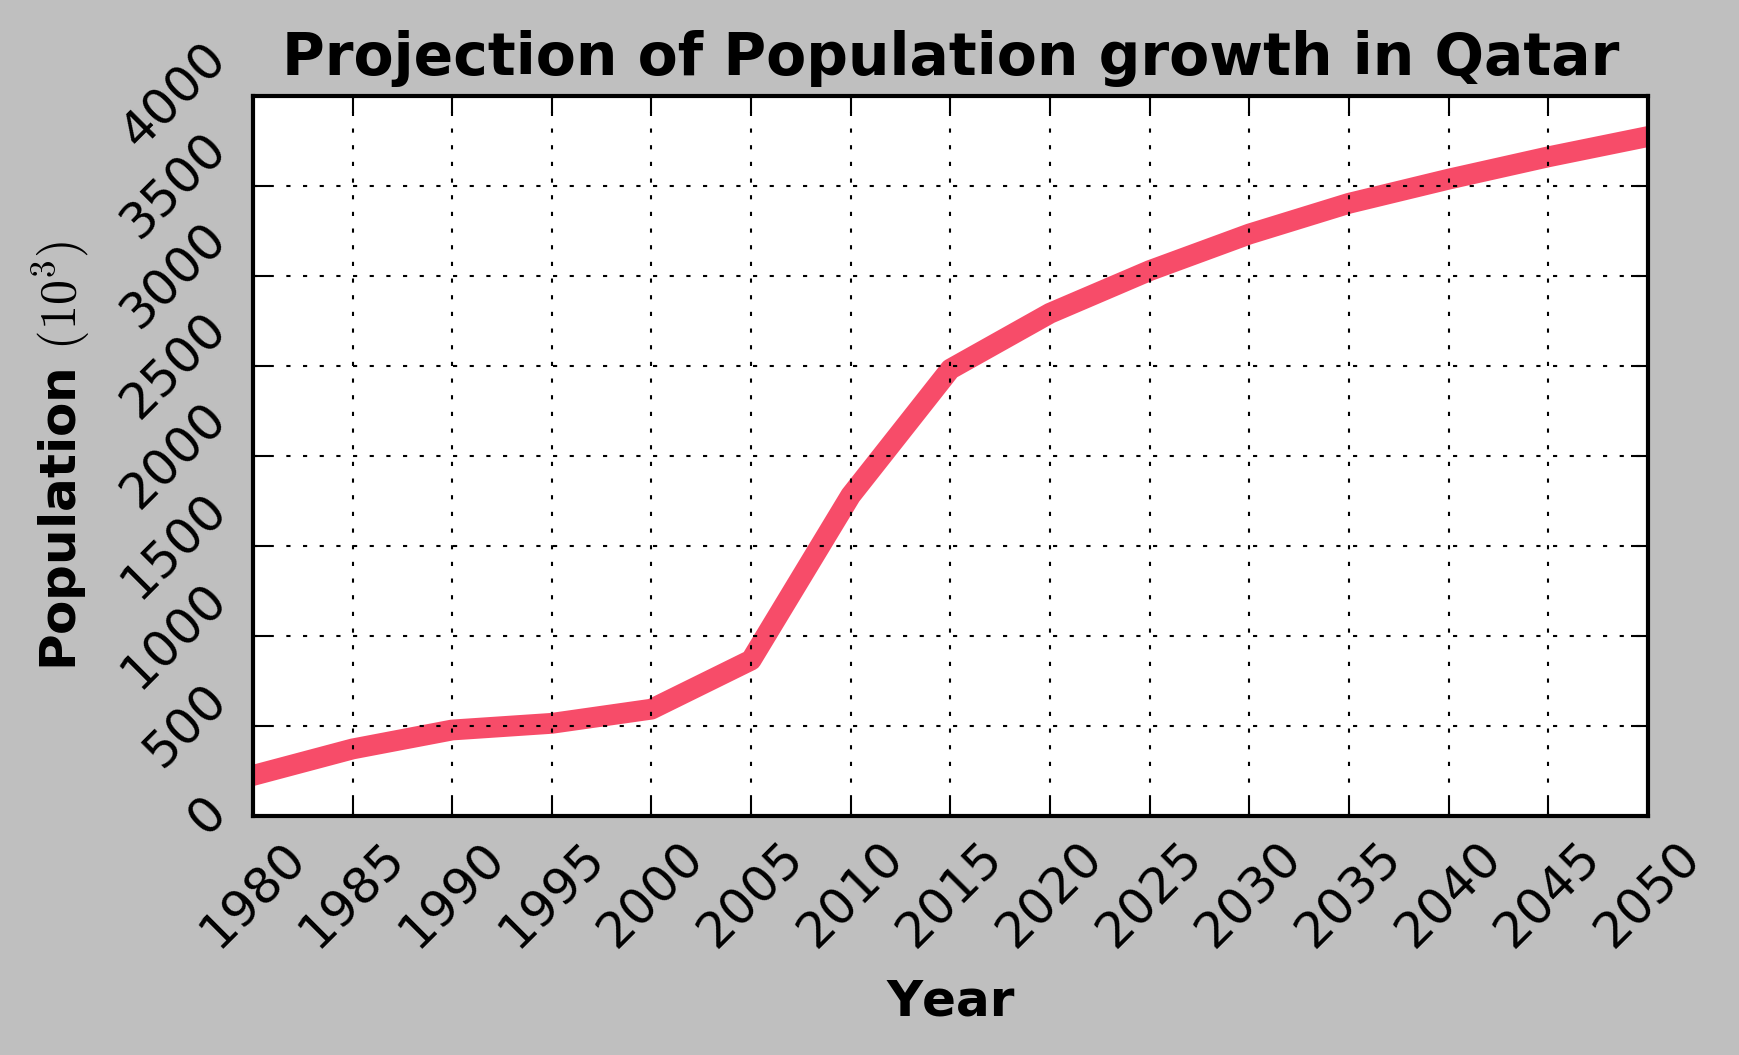

In [76]:
year = np.arange(1980,2055,5)
population = np.array([223775,371081,476445,513445,592267,864863,1779676,2481539,
              2791807,3028568,3231911,3402497,3536617,3660625,3773285])/1000
mpl.style.use('classic')
plt.rcParams["font.family"] = "sans-serif"
#plt.rcParams["font.weight"] = "bold"
plt.rcParams["font.size"] = 12
plt.rcParams["axes.labelweight"] = "bold"
fig, axes = plt.subplots(figsize=(6,3),dpi=300)

plt.plot(year,population, linewidth = 5, alpha=0.9, color='#F73859')

plt.title('Projection of Population growth in Qatar',size=14,fontweight='bold')
plt.ylabel('Population $(10^3)$')
plt.xlabel('Year')
plt.grid()
#axes.set_ylim([0,100])
axes.tick_params(axis='both',labelrotation=45)
plt.xticks(year,year)
plt.savefig('Figure6.jpeg', dpi=300, bbox_inches="tight", pad_inches= 0)
plt.show()

# Target Population

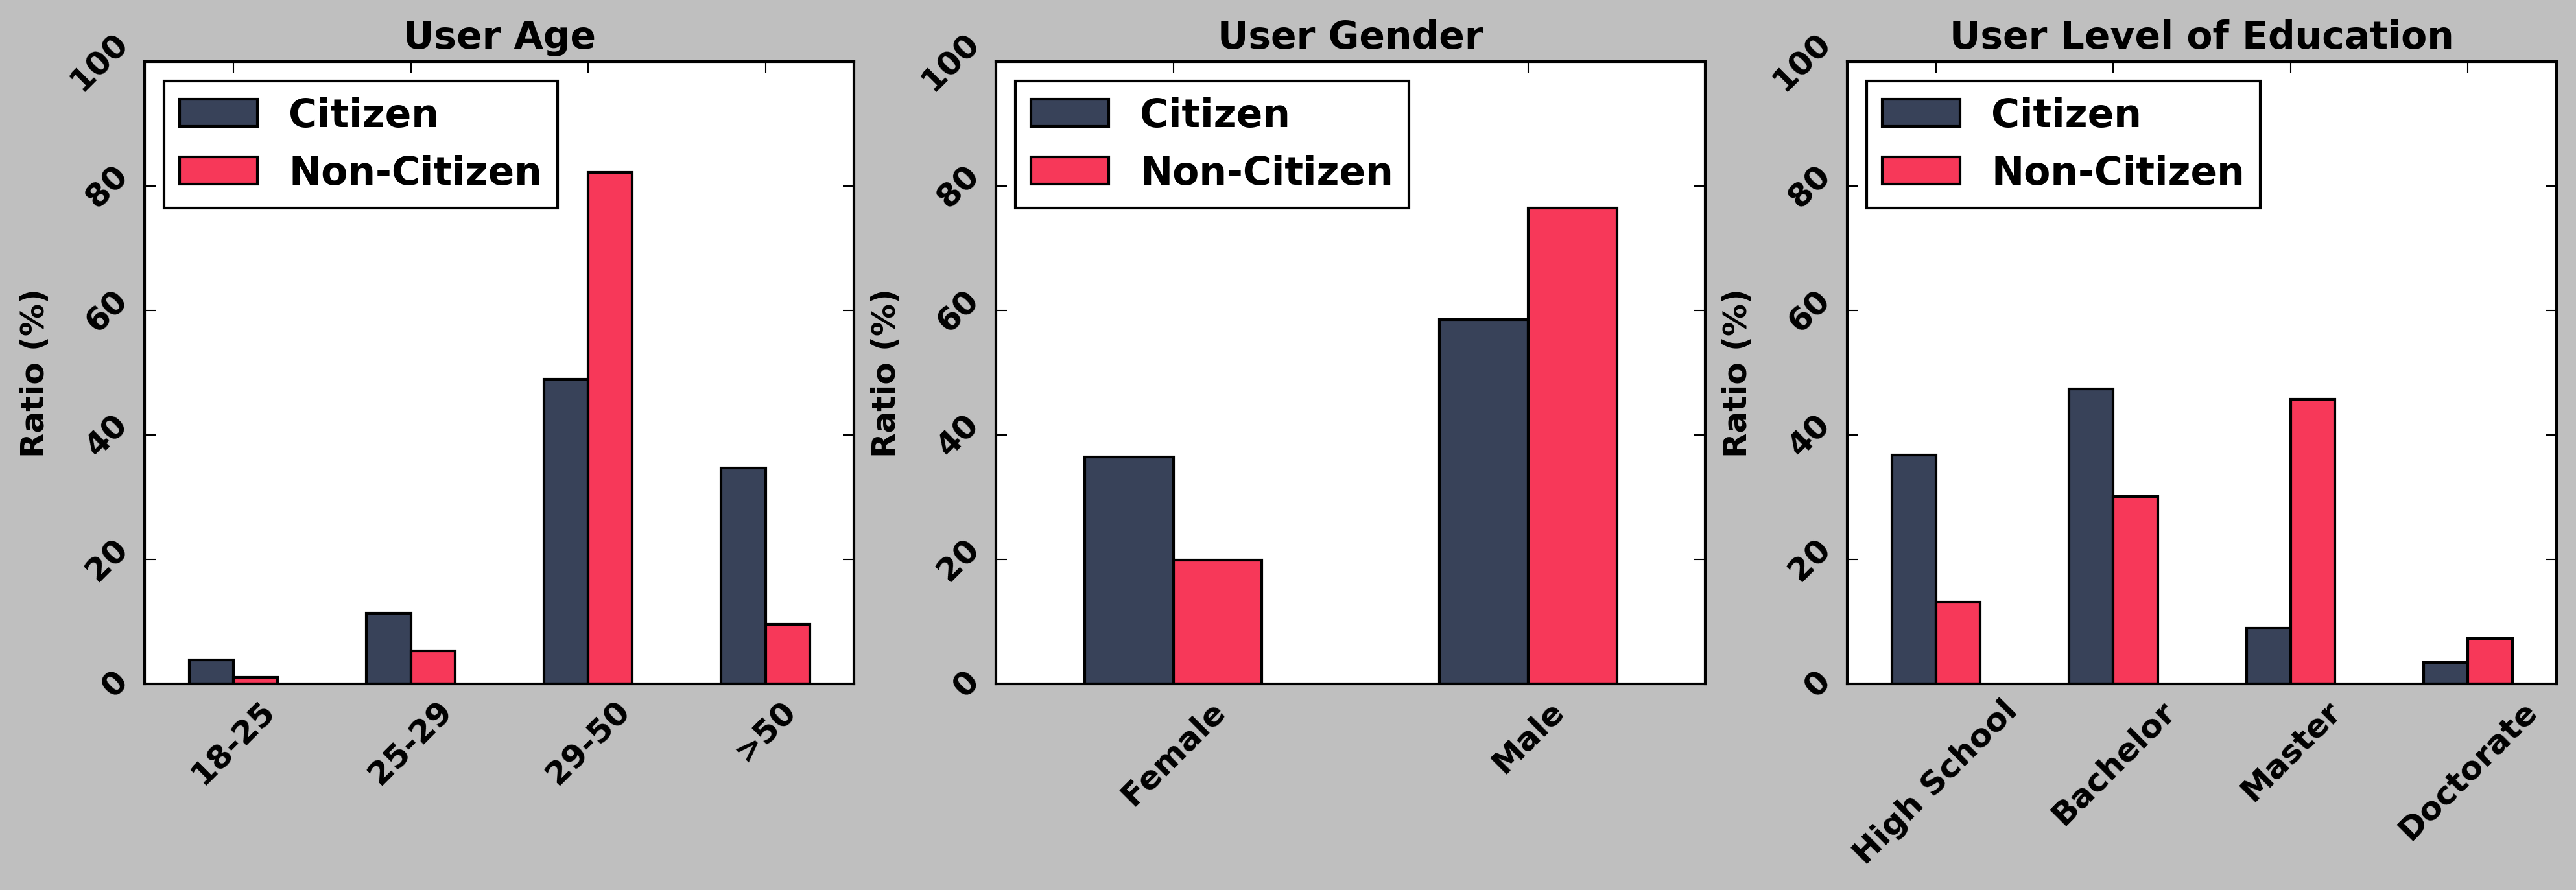

In [78]:
mpl.style.use('classic')
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.weight"] = "bold"
plt.rcParams["font.size"] = 12
plt.rcParams["axes.labelweight"] = "bold"
# my_color = list(["#2B2E4A","#E84545"])
# my_color = list(["#384259","#F73859"])
my_color = list(["#384259","#F73859"])
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(16,4),dpi=300)
Data_Qatar = Data_raw[Data_raw.Nationality == 1].reset_index().drop('index', axis=1)
Data_NonQatar = Data_raw[Data_raw.Nationality != 1].reset_index().drop('index', axis=1)
# Housholder Age
Feature = "UserAge"
Qatar = pd.DataFrame(Data_Qatar[Feature].value_counts()/len(Data_Qatar[Feature])*100).rename(columns={Feature:"Citizen"}).sort_index()
NonQatar = pd.DataFrame(Data_NonQatar[Feature].value_counts()/len(Data_NonQatar[Feature])*100).rename(columns={Feature:"Non-Citizen"}).sort_index()
pd.concat([Qatar,NonQatar],axis=1).plot.bar(ax=axes[0,], color=my_color)
axes[0].set_title('User Age',size=14,fontweight='bold')
axes[0].set_ylabel('Ratio (%)')
axes[0].set_ylim([0,100])
axes[0].tick_params(axis='both',labelrotation=45)
axes[0].legend(loc='upper left')
axes[0].set_xticklabels(["18-25","25-29","29-50",">50"])
axes[0].set_yticklabels(np.arange(0,110,20))
# Gender
Feature = "UserGender"
Qatar = pd.DataFrame(Data_Qatar[Feature].value_counts()/len(Data_Qatar[Feature])*100).rename(columns={Feature:"Citizen"}).sort_index()
NonQatar = pd.DataFrame(Data_NonQatar[Feature].value_counts()/len(Data_NonQatar[Feature])*100).rename(columns={Feature:"Non-Citizen"}).sort_index()
pd.concat([Qatar,NonQatar],axis=1).plot.bar(ax=axes[1,], color=my_color)
axes[1].set_title('User Gender',size=14,fontweight='bold')
axes[1].set_ylabel('Ratio (%)')
axes[1].set_ylim([0,100])
axes[1].tick_params(axis='both',labelrotation=45)
axes[1].legend(loc='upper left')
axes[1].set_xticklabels(["Female","Male"])
axes[1].set_yticklabels(np.arange(0,110,20))

# Education
Feature = "Education"
Qatar = pd.DataFrame(Data_Qatar[Feature].value_counts()/len(Data_Qatar[Feature])*100).rename(columns={Feature:"Citizen"}).sort_index()
NonQatar = pd.DataFrame(Data_NonQatar[Feature].value_counts()/len(Data_NonQatar[Feature])*100).rename(columns={Feature:"Non-Citizen"}).sort_index()
pd.concat([Qatar,NonQatar],axis=1).plot.bar(ax=axes[2,], color=my_color)
axes[2].set_title('User Level of Education',size=14,fontweight='bold')
axes[2].set_ylabel('Ratio (%)')
axes[2].set_ylim([0,100])
axes[2].tick_params(axis='both',labelrotation=45)
axes[2].legend(loc='upper left')
axes[2].set_xticklabels(["High School","Bachelor","Master","Doctorate"])
axes[2].set_yticklabels(np.arange(0,110,20))
plt.savefig('Figure7a.jpeg', dpi=300, bbox_inches="tight", pad_inches= 0)
plt.show()

# Job Category

In [79]:
#Job Category
Feature = "JobCat"
nation_labels = {1:'Engineering',2:'Art',3:'Tech and Sciene',4:'Education',
                 5:'Finance',6:'Government',7:'Healthcare',8:'Marketing',9:'Law',
                 10:'Services',11:'Manufacturing',12:'Other'}
JobCat = pd.DataFrame(
    Data_raw[Feature].value_counts()/len(Data_raw[Feature])*100).rename(index=nation_labels,columns={Feature:"Group Percentage (%)"})
JobCat

,Group Percentage (%)
Education,26.096423
Finance,20.559876
Engineering,17.760498
Healthcare,7.869362
Government,6.314152
Manufacturing,4.696734
Tech and Sciene,3.514774
Services,2.706065
Law,2.674961
Art,2.301711


# Financial Factors

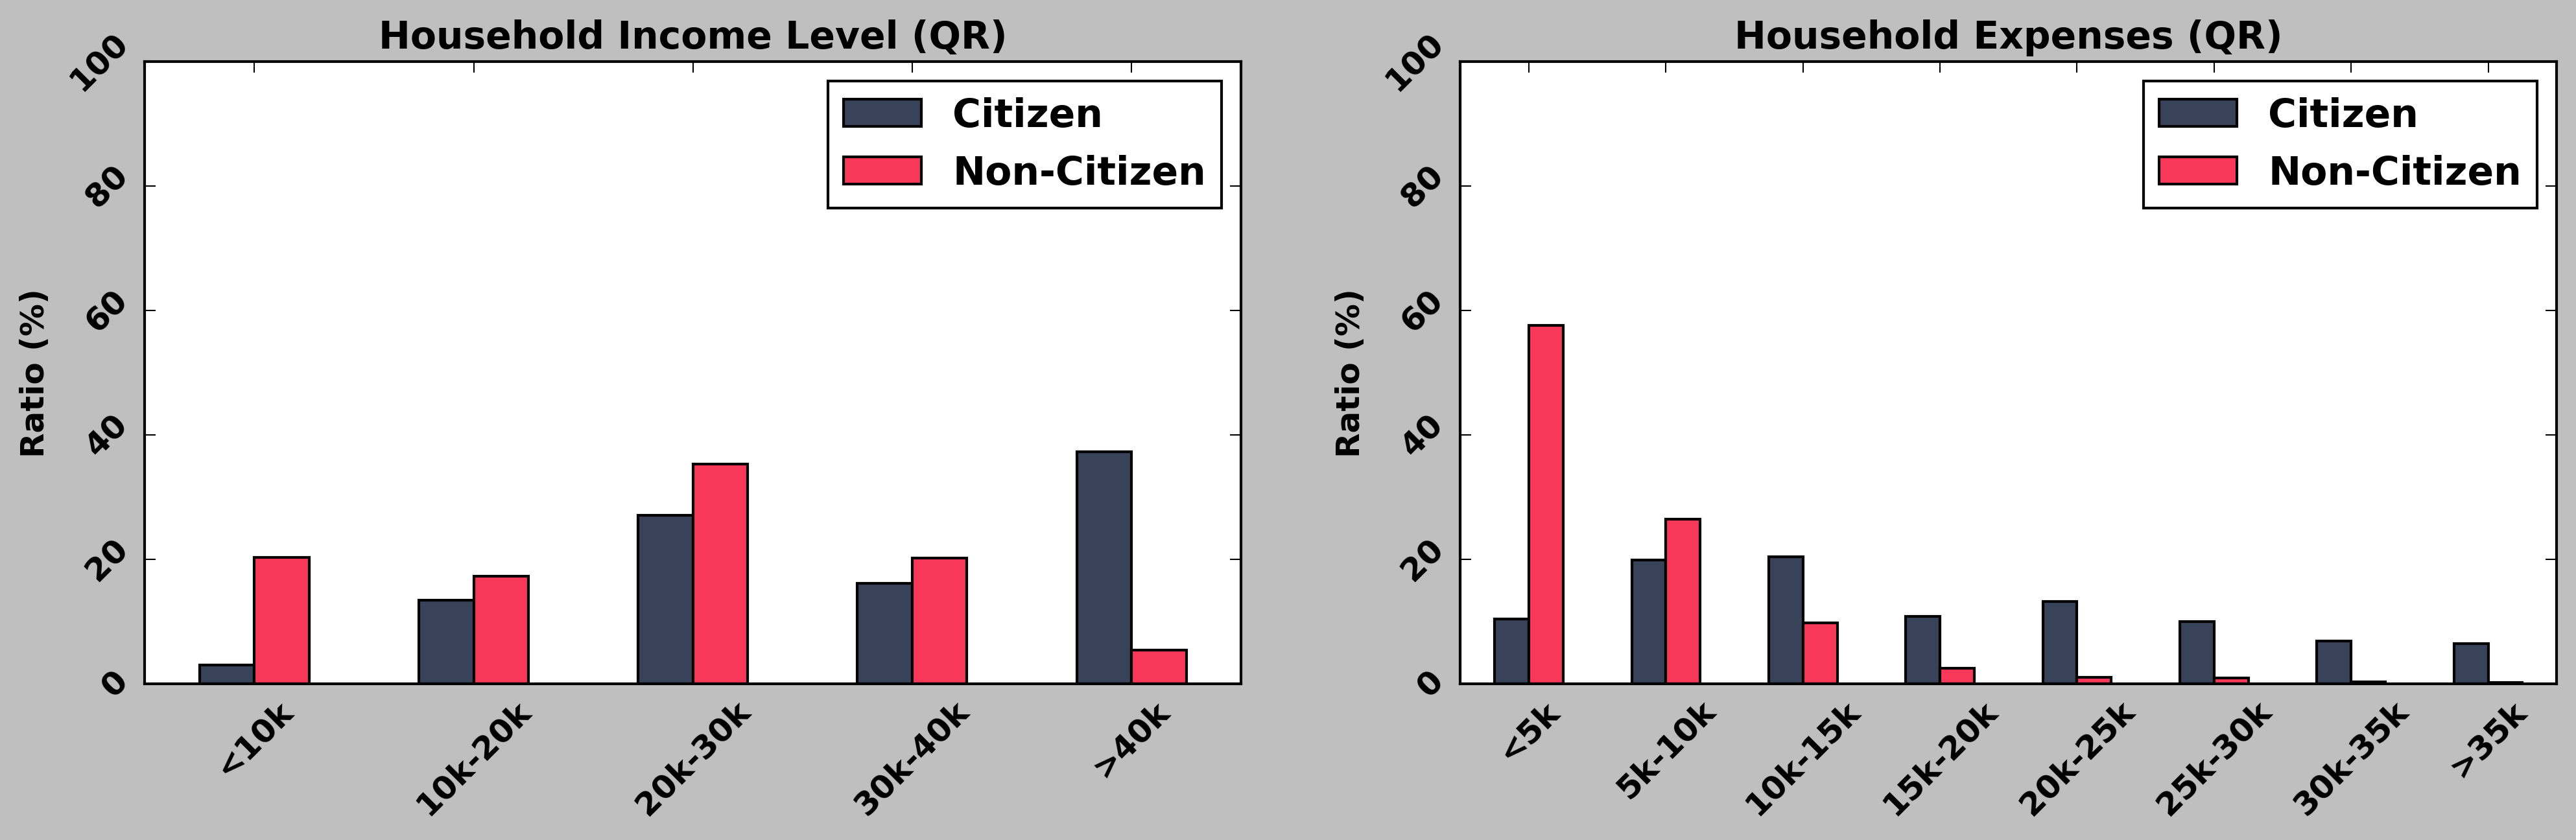

In [80]:
mpl.style.use('classic')
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.weight"] = "bold"
plt.rcParams["font.size"] = 12
plt.rcParams["axes.labelweight"] = "bold"
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(16,4),dpi=300)
Data_Qatar = Data_raw[Data_raw.Nationality == 1].reset_index().drop('index', axis=1)
Data_NonQatar = Data_raw[Data_raw.Nationality != 1].reset_index().drop('index', axis=1)
#Income
Feature = "Income"
Qatar = pd.DataFrame(Data_Qatar[Feature].value_counts()/len(Data_Qatar[Feature])*100).rename(columns={Feature:"Citizen"}).sort_index()
NonQatar = pd.DataFrame(Data_NonQatar[Feature].value_counts()/len(Data_NonQatar[Feature])*100).rename(columns={Feature:"Non-Citizen"}).sort_index()
pd.concat([Qatar,NonQatar],axis=1).plot.bar(ax=axes[0,], color=my_color)
axes[0].set_title('Household Income Level (QR)',size=14,fontweight='bold')
axes[0].set_ylabel('Ratio (%)')
axes[0].set_ylim([0,100])
axes[0].tick_params(axis='both',labelrotation=45)
axes[0].legend()
axes[0].set_xticklabels(["<10k","10k-20k","20k-30k","30k-40k",">40k"])
axes[0].set_yticklabels(np.arange(0,110,20))
# Expneses
Feature = "Expneses"
Qatar = pd.DataFrame(Data_Qatar[Feature].value_counts()/len(Data_Qatar[Feature])*100).rename(columns={Feature:"Citizen"}).sort_index()
NonQatar = pd.DataFrame(Data_NonQatar[Feature].value_counts()/len(Data_NonQatar[Feature])*100).rename(columns={Feature:"Non-Citizen"}).sort_index()
pd.concat([Qatar,NonQatar],axis=1).plot.bar(ax=axes[1,], color=my_color)
axes[1].set_title('Household Expenses (QR)',size=14,fontweight='bold')
axes[1].set_ylabel('Ratio (%)')
axes[1].set_ylim([0,100])
axes[1].tick_params(axis='both',labelrotation=45)
axes[1].legend()
axes[1].set_xticklabels(["<5k","5k-10k","10k-15k","15k-20k","20k-25k","25k-30k","30k-35k",">35k"])
axes[1].set_yticklabels(np.arange(0,110,20))
plt.savefig('Figure7b.jpeg', dpi=300, bbox_inches="tight", pad_inches= 0)
plt.show()

# User Attitude

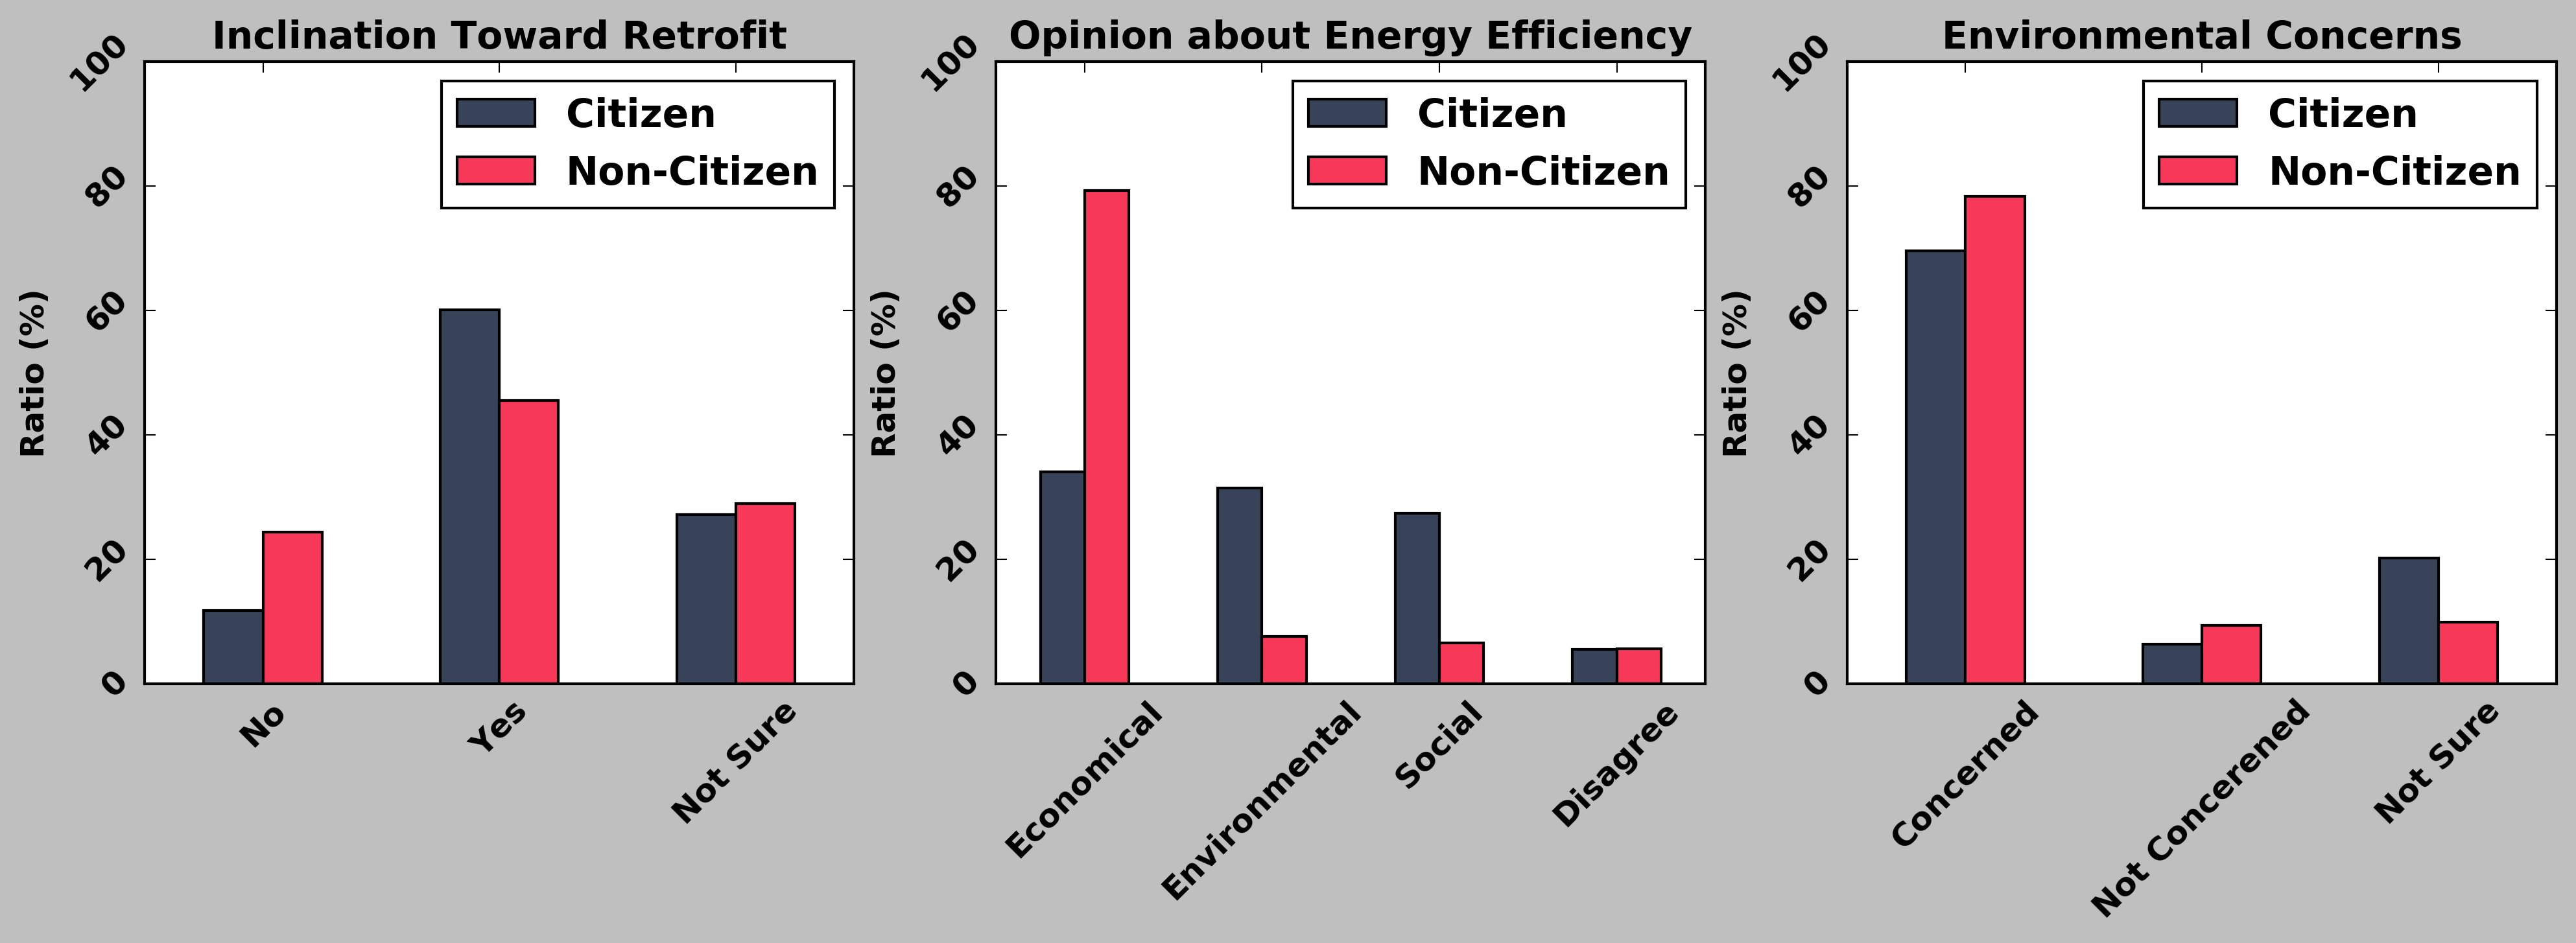

In [81]:
mpl.style.use('classic')
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.weight"] = "bold"
plt.rcParams["font.size"] = 12
plt.rcParams["axes.labelweight"] = "bold"
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(16,4),dpi=300)
Data_Qatar = Data_raw[Data_raw.Nationality == 1].reset_index().drop('index', axis=1)
Data_NonQatar = Data_raw[Data_raw.Nationality != 1].reset_index().drop('index', axis=1)
# UpgradeWillingness Preference
Feature = "UpgradeWillingness"
Qatar = pd.DataFrame(Data_Qatar[Feature].value_counts()/len(Data_Qatar[Feature])*100).rename(columns={Feature:"Citizen"}).sort_index()
NonQatar = pd.DataFrame(Data_NonQatar[Feature].value_counts()/len(Data_NonQatar[Feature])*100).rename(columns={Feature:"Non-Citizen"}).sort_index()
pd.concat([Qatar,NonQatar],axis=1).plot.bar(ax=axes[0,], color=my_color)
axes[0].set_title('Inclination Toward Retrofit',size=14,fontweight='bold')
axes[0].set_ylabel('Ratio (%)')
axes[0].set_ylim([0,100])
axes[0].tick_params(axis='both',labelrotation=45)
axes[0].legend()
axes[0].set_xticklabels(["No","Yes","Not Sure"])
axes[0].set_yticklabels(np.arange(0,110,20))
# SmartAttitude
Feature = "SmartAttitude"
Qatar = pd.DataFrame(Data_Qatar[Feature].value_counts()/len(Data_Qatar[Feature])*100).rename(columns={Feature:"Citizen"}).sort_index()
NonQatar = pd.DataFrame(Data_NonQatar[Feature].value_counts()/len(Data_NonQatar[Feature])*100).rename(columns={Feature:"Non-Citizen"}).sort_index()
pd.concat([Qatar,NonQatar],axis=1).plot.bar(ax=axes[1,], color=my_color)
axes[1].set_title('Opinion about Energy Efficiency',size=14,fontweight='bold')
axes[1].set_ylabel('Ratio (%)')
axes[1].set_ylim([0,100])
axes[1].tick_params(axis='both',labelrotation=45)
axes[1].legend()
axes[1].set_xticklabels(["Economical","Environmental","Social","Disagree"])
axes[1].set_yticklabels(np.arange(0,110,20))

# ClimateAttitude
Feature = "ClimateAttitude"
Qatar = pd.DataFrame(Data_Qatar[Feature].value_counts()/len(Data_Qatar[Feature])*100).rename(columns={Feature:"Citizen"}).sort_index()
NonQatar = pd.DataFrame(Data_NonQatar[Feature].value_counts()/len(Data_NonQatar[Feature])*100).rename(columns={Feature:"Non-Citizen"}).sort_index()
pd.concat([Qatar,NonQatar],axis=1).plot.bar(ax=axes[2,], color=my_color)
axes[2].set_title('Environmental Concerns',size=14,fontweight='bold')
axes[2].set_ylabel('Ratio (%)')
axes[2].set_ylim([0,100])
axes[2].tick_params(axis='both',labelrotation=45)
axes[2].legend()
axes[2].set_xticklabels(["Concerned","Not Concerened","Not Sure"])
axes[2].set_yticklabels(np.arange(0,110,20))
plt.savefig('Figure8b.jpeg', dpi=300, bbox_inches="tight", pad_inches= 0)
plt.show()

# Energy Use Preference

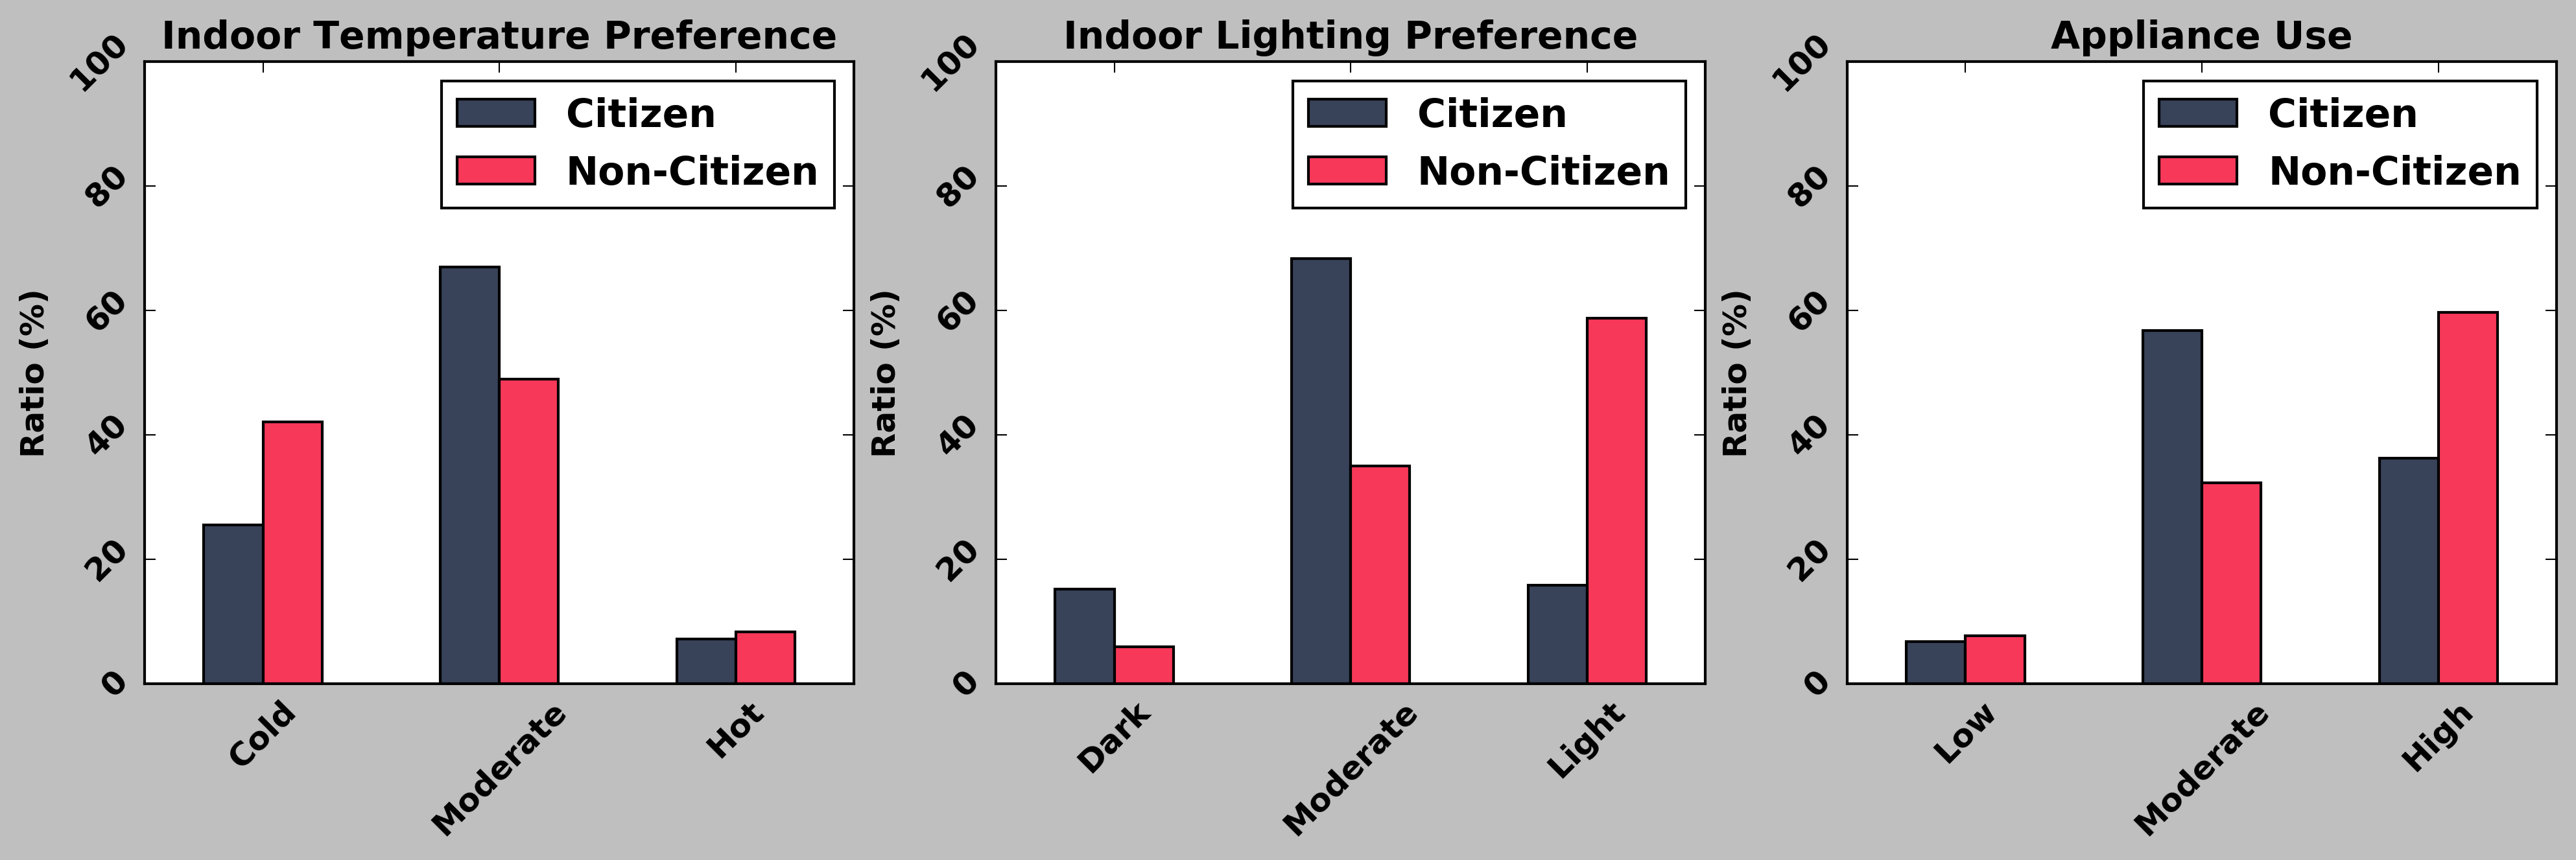

In [82]:
mpl.style.use('classic')
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.weight"] = "bold"
plt.rcParams["font.size"] = 12
plt.rcParams["axes.labelweight"] = "bold"
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(16,4),dpi=300)
Data_Qatar = Data_raw[Data_raw.Nationality == 1].reset_index().drop('index', axis=1)
Data_NonQatar = Data_raw[Data_raw.Nationality != 1].reset_index().drop('index', axis=1)
# Temperature Preference
Feature = "IndoorTemp"
Qatar = pd.DataFrame(Data_Qatar[Feature].value_counts()/len(Data_Qatar[Feature])*100).rename(columns={Feature:"Citizen"}).sort_index()
NonQatar = pd.DataFrame(Data_NonQatar[Feature].value_counts()/len(Data_NonQatar[Feature])*100).rename(columns={Feature:"Non-Citizen"}).sort_index()
pd.concat([Qatar,NonQatar],axis=1).plot.bar(ax=axes[0,], color=my_color)
axes[0].set_title('Indoor Temperature Preference',size=14,fontweight='bold')
axes[0].set_ylabel('Ratio (%)')
axes[0].set_ylim([0,100])
axes[0].tick_params(axis='both',labelrotation=45)
axes[0].legend()
axes[0].set_xticklabels(["Cold","Moderate","Hot"])
axes[0].set_yticklabels(np.arange(0,110,20))
# Lighting Preference
Feature = "Lighting"
Qatar = pd.DataFrame(Data_Qatar[Feature].value_counts()/len(Data_Qatar[Feature])*100).rename(columns={Feature:"Citizen"}).sort_index()
NonQatar = pd.DataFrame(Data_NonQatar[Feature].value_counts()/len(Data_NonQatar[Feature])*100).rename(columns={Feature:"Non-Citizen"}).sort_index()
pd.concat([Qatar,NonQatar],axis=1).plot.bar(ax=axes[1,], color=my_color)
axes[1].set_title('Indoor Lighting Preference',size=14,fontweight='bold')
axes[1].set_ylabel('Ratio (%)')
axes[1].set_ylim([0,100])
axes[1].tick_params(axis='both',labelrotation=45)
axes[1].legend()
axes[1].set_xticklabels(["Dark","Moderate","Light"])
axes[1].set_yticklabels(np.arange(0,110,20))

# Appliance Use
Feature = "ApplianceUse"
Qatar = pd.DataFrame(Data_Qatar[Feature].value_counts()/len(Data_Qatar[Feature])*100).rename(columns={Feature:"Citizen"}).sort_index()
NonQatar = pd.DataFrame(Data_NonQatar[Feature].value_counts()/len(Data_NonQatar[Feature])*100).rename(columns={Feature:"Non-Citizen"}).sort_index()
pd.concat([Qatar,NonQatar],axis=1).plot.bar(ax=axes[2,], color=my_color)
axes[2].set_title('Appliance Use',size=14,fontweight='bold')
axes[2].set_ylabel('Ratio (%)')
axes[2].set_ylim([0,100])
axes[2].tick_params(axis='both',labelrotation=45)
axes[2].legend()
axes[2].set_xticklabels(["Low","Moderate","High"])
axes[2].set_yticklabels(np.arange(0,110,20))
plt.savefig('Figure8a.jpeg', dpi=300, bbox_inches="tight", pad_inches= 0)
plt.show()

# Building Features

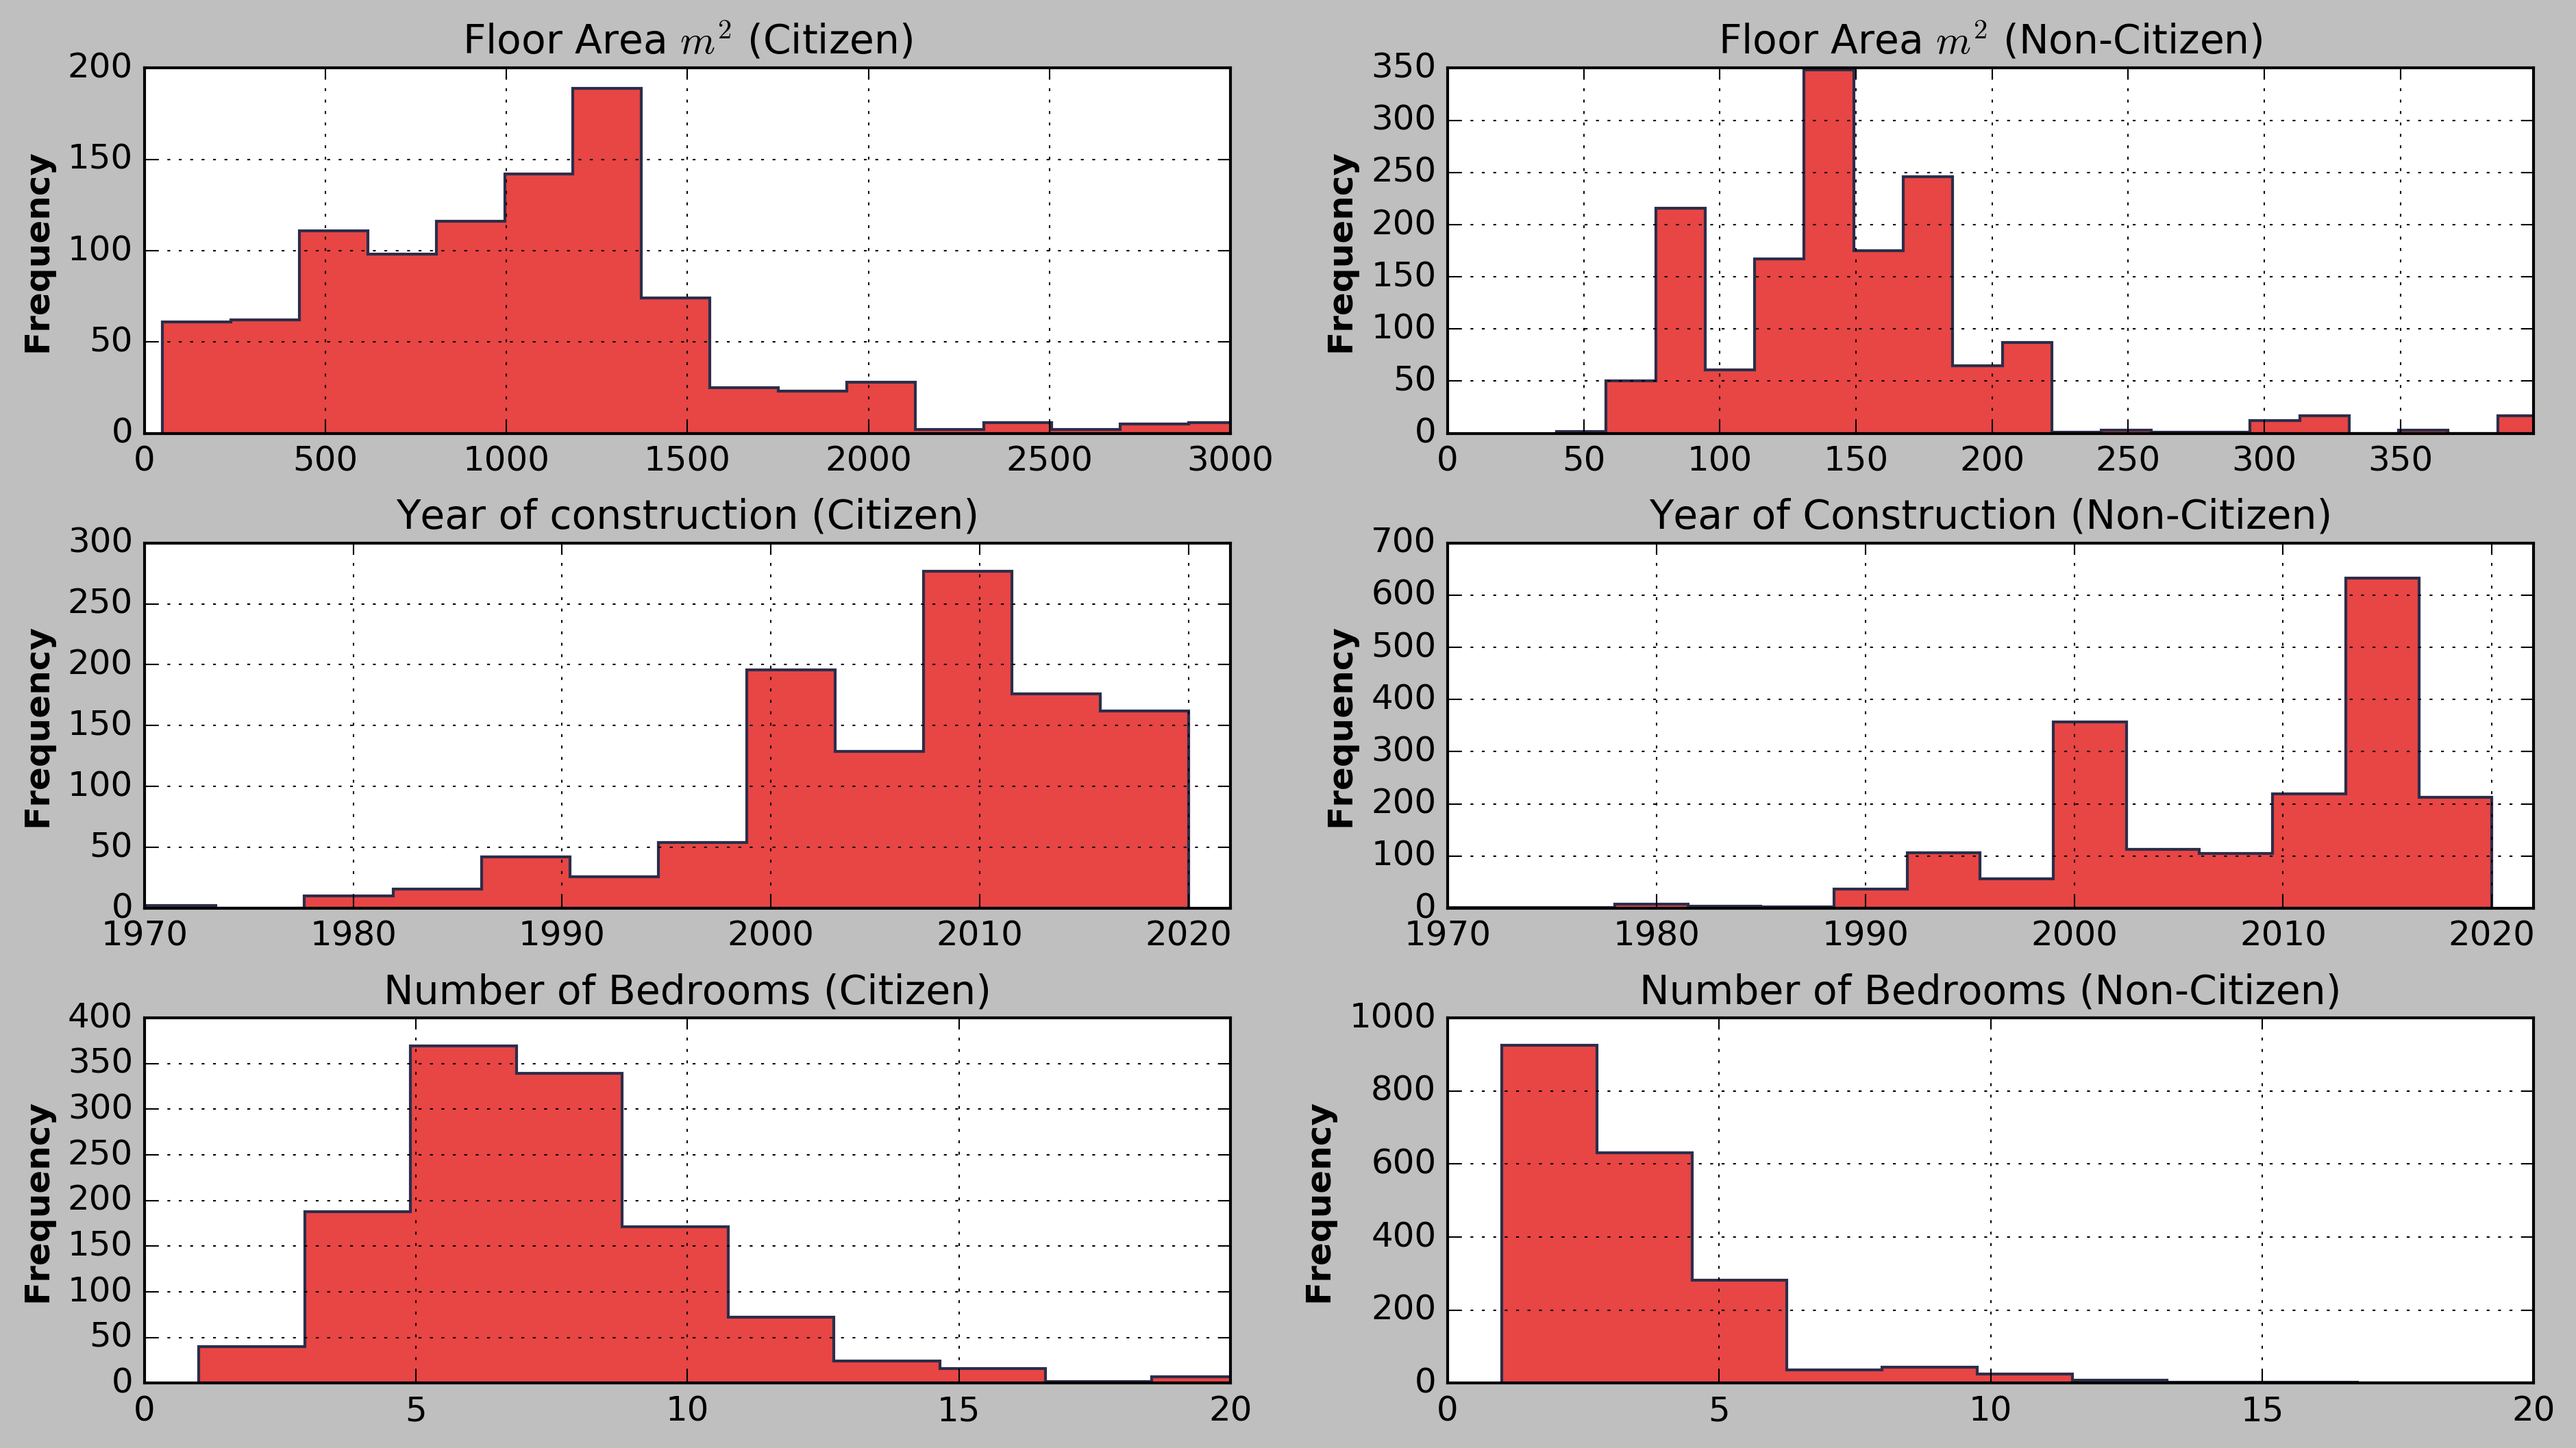

In [83]:
import pandas as pd
from matplotlib.font_manager import FontProperties
mpl.style.use('classic')
plt.rcParams["font.family"] = "sans-serif"
#plt.rcParams["font.weight"] = "bold"
plt.rcParams["font.size"] = 12
plt.rcParams["axes.labelweight"] = "bold"

Data_Qatar = Data_raw[Data_raw.Nationality == 1].reset_index().drop('index', axis=1)
Data_NonQatar = Data_raw[Data_raw.Nationality != 1].reset_index().drop('index', axis=1)
#########################
# Area Citizen
Feature = "Area"
df = Data_Qatar[Feature].dropna()
f = plt.figure(figsize=(15,8), dpi=300)
f.tight_layout()
ax1 = f.add_subplot(321)
ax1.hist(df, 50, density=False, histtype='stepfilled', facecolor='#E84545',edgecolor='#2B2E4A')
ax1.grid()
ax1.set_xlim([0, 3000])
ax1.set_ylabel('Frequency')

ax1.set_title('Floor Area $m^2$ (Citizen)',size=14)#,fontweight='bold')
# Area non-Citizen
Feature = "Area"
df = Data_NonQatar[Data_NonQatar[Feature]<1000][Feature].dropna()
ax2 = f.add_subplot(322)
ax2.hist(df, 50, density=False, histtype='stepfilled', facecolor='#E84545',edgecolor='#2B2E4A')
ax2.grid()
ax2.set_xlim([0, 399])
ax2.set_title('Floor Area $m^2$ (Non-Citizen)',size=14)#,fontweight='bold')
ax2.set_ylabel('Frequency')

#########################
# YearBuilt (citizen)
Feature = "YearBuilt"
df = Data_Qatar[Feature].dropna()
ax3 = f.add_subplot(323)
ax3.hist(df, 30, density=False, histtype='stepfilled', facecolor='#E84545',edgecolor='#2B2E4A')
ax3.grid()
ax3.set_xlim([1970, 2022])
ax3.ticklabel_format(useOffset=False)
ax3.set_title('Year of construction (Citizen)',size=14)#,fontweight='bold')
ax3.set_ylabel('Frequency')

# YearBuilt non-Citizen
Feature = "YearBuilt"
df = Data_NonQatar[Feature].dropna()
ax4 = f.add_subplot(324)
ax4.hist(df, 30, density=False, histtype='stepfilled', facecolor='#E84545',edgecolor='#2B2E4A')
ax4.grid()
ax4.set_xlim([1970, 2022])
ax4.ticklabel_format(useOffset=False)
ax4.set_title('Year of Construction (Non-Citizen)',size=14)#,fontweight='bold')
ax4.set_ylabel('Frequency')

#########################
# Bedrooms Citizen
Feature = "Bedrooms"
df = Data_Qatar[Feature].dropna()
ax5 = f.add_subplot(325)
ax5.hist(df, 20, density=False, histtype='stepfilled', facecolor='#E84545',edgecolor='#2B2E4A')
ax5.grid()
ax5.set_xlim([0, 20])
ax5.set_title('Number of Bedrooms (Citizen)',size=14)#,fontweight='bold')
ax5.set_ylabel('Frequency')

# Bedrooms non-Citizen
Feature = "Bedrooms"
df = Data_NonQatar[Feature].dropna()
ax6 = f.add_subplot(326)
ax6.hist(df, 20, density=False, histtype='stepfilled', facecolor='#E84545',edgecolor='#2B2E4A')
ax6.grid()
ax6.set_xlim([0, 20])
ax6.set_title('Number of Bedrooms (Non-Citizen)',size=14)#,fontweight='bold')
ax6.set_ylabel('Frequency')


plt.subplots_adjust(hspace=0.3)
plt.show()
f.savefig('Figure10.jpeg', dpi=600, bbox_inches="tight", pad_inches= 0)


# Home Types

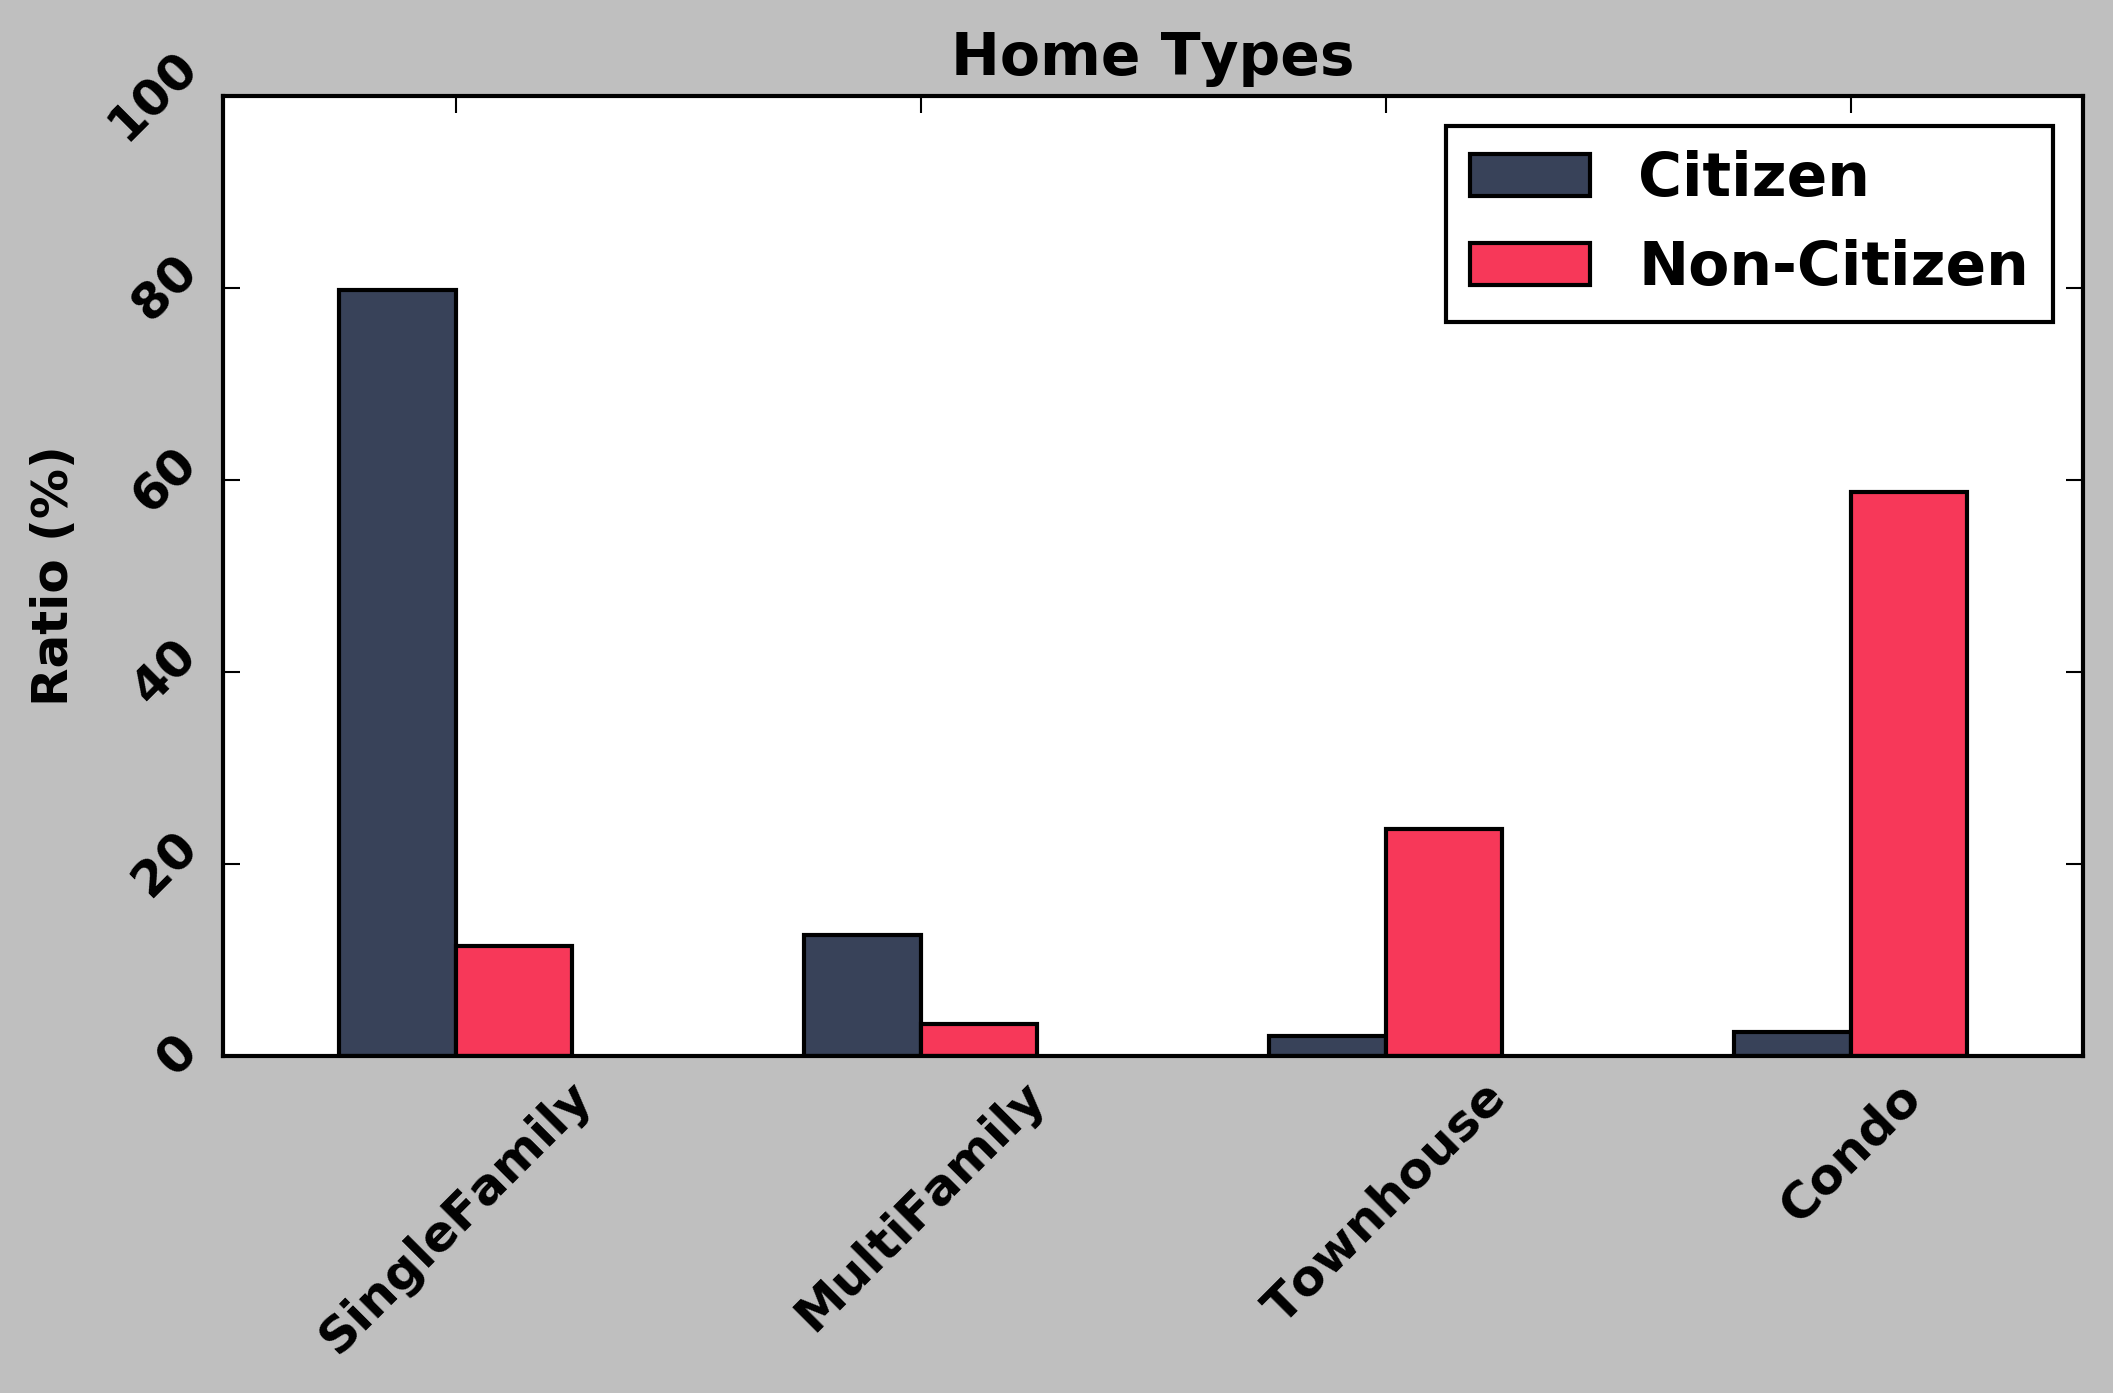

In [84]:
mpl.style.use('classic')
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.weight"] = "bold"
plt.rcParams["font.size"] = 12
plt.rcParams["axes.labelweight"] = "bold"
fig, axes = plt.subplots(figsize=(8,4),dpi=300)
Data_Qatar = Data_raw[Data_raw.Nationality == 1].reset_index().drop('index', axis=1)
Data_NonQatar = Data_raw[Data_raw.Nationality != 1].reset_index().drop('index', axis=1)
# Temperature Preference
Feature = "HomeType"
Qatar = pd.DataFrame(Data_Qatar[Feature].value_counts()/len(Data_Qatar[Feature])*100).rename(columns={Feature:"Citizen"}).sort_index()
NonQatar = pd.DataFrame(Data_NonQatar[Feature].value_counts()/len(Data_NonQatar[Feature])*100).rename(columns={Feature:"Non-Citizen"}).sort_index()
pd.concat([Qatar,NonQatar],axis=1).plot.bar(ax=axes, color=my_color)
axes.set_title('Home Types',size=14,fontweight='bold')
axes.set_ylabel('Ratio (%)')
axes.set_ylim([0,100])
axes.tick_params(axis='both',labelrotation=45)
axes.legend()
axes.set_xticklabels(['SingleFamily','MultiFamily','Townhouse','Condo'])
axes.set_yticklabels(np.arange(0,110,20))
plt.savefig('Figure9.jpeg', dpi=600, bbox_inches="tight", pad_inches= 0)
plt.show()

# Energy Bill

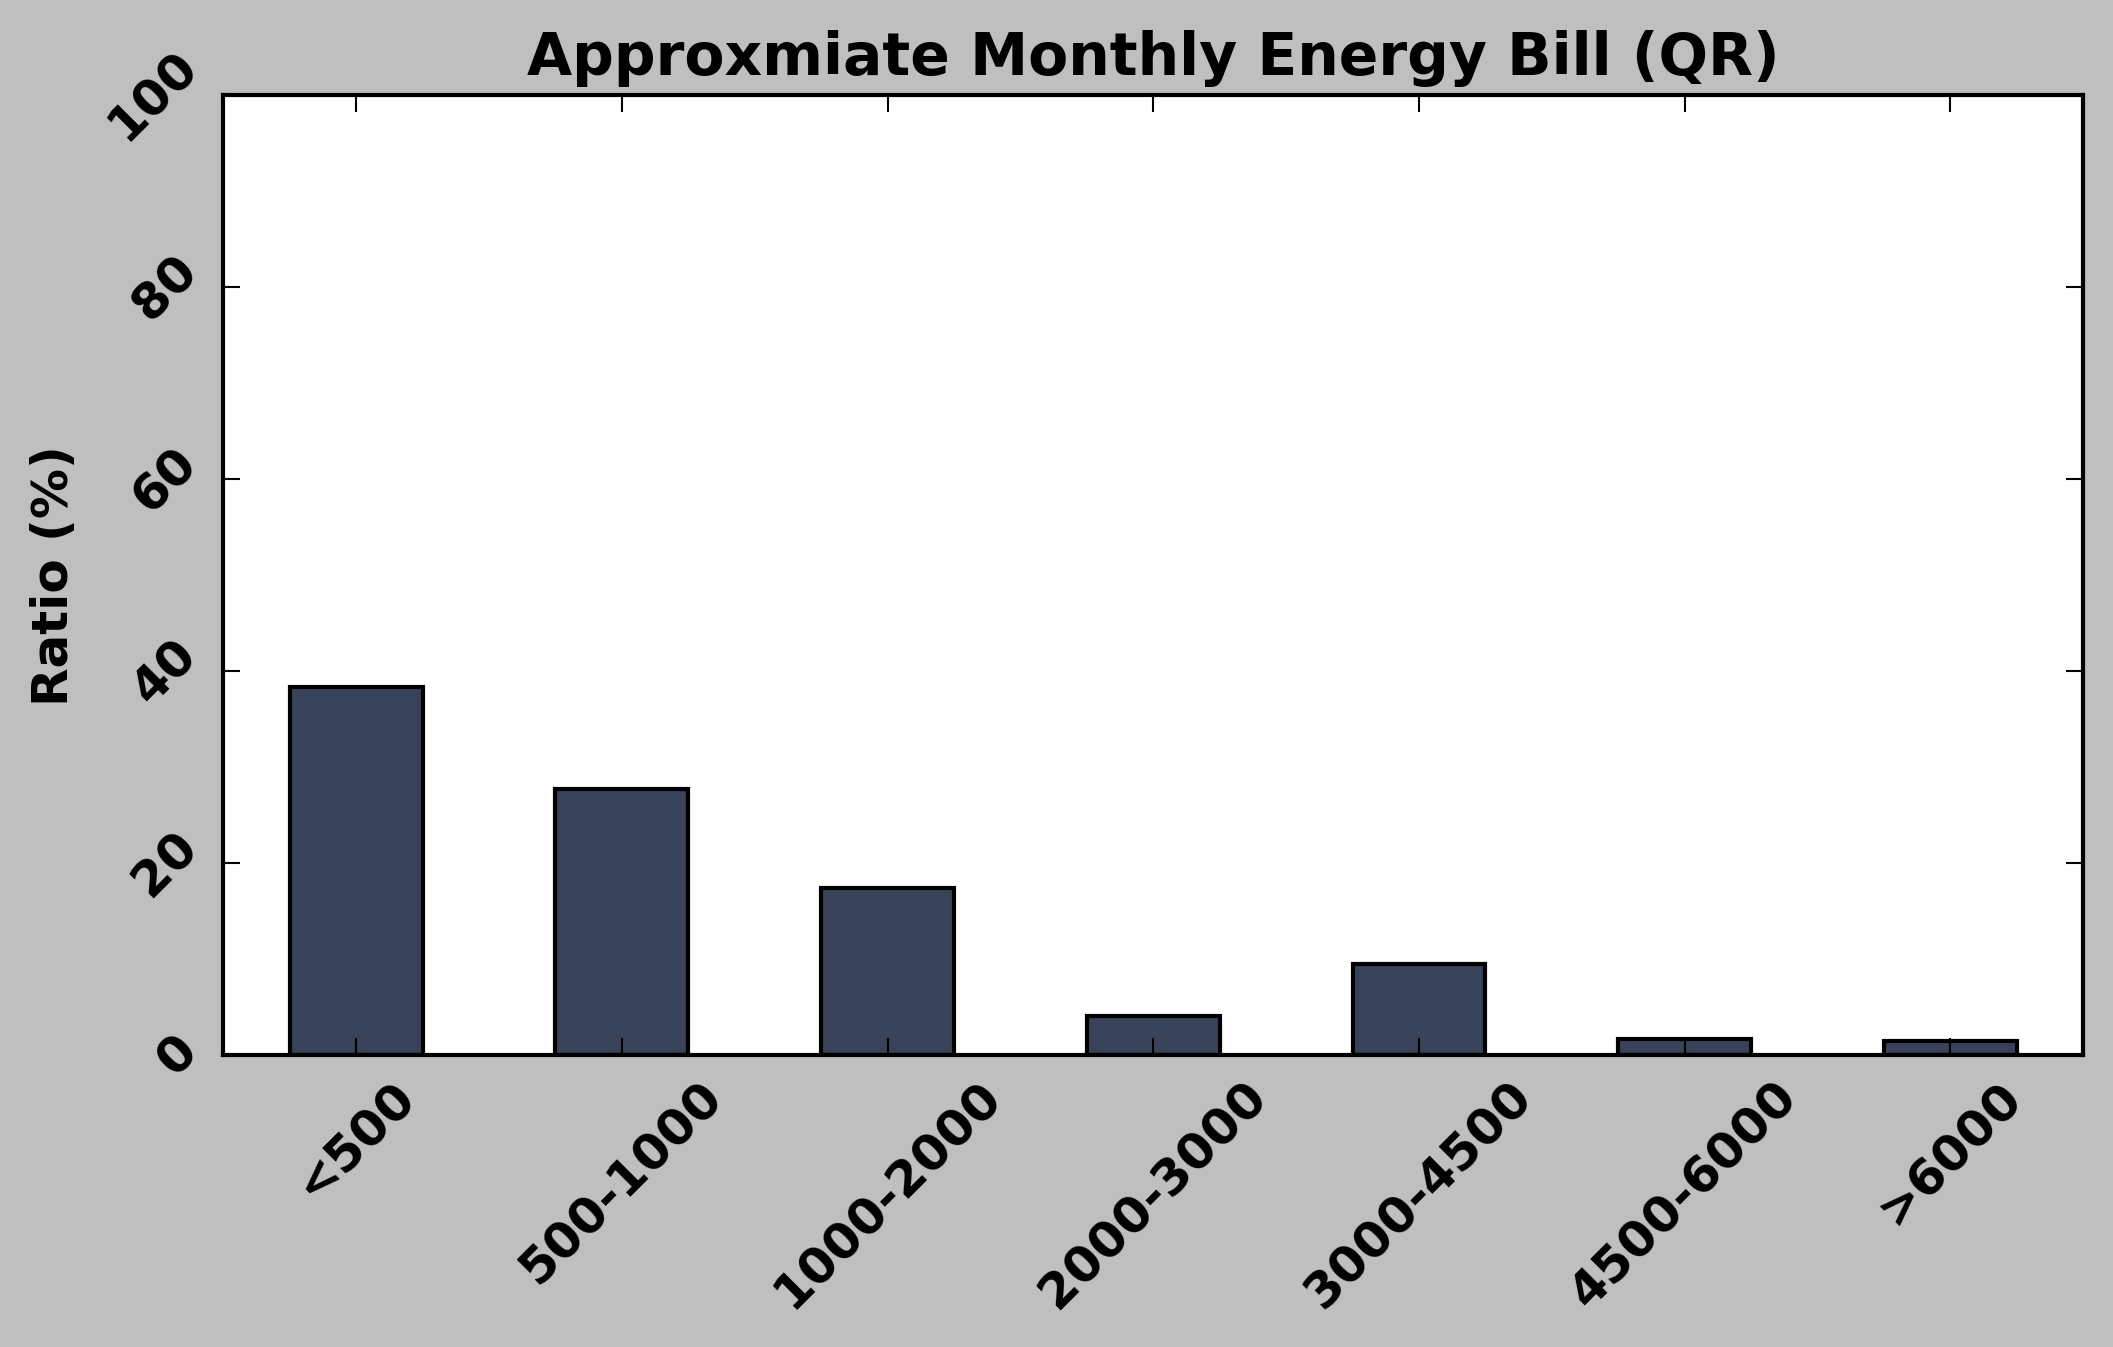

In [85]:
mpl.style.use('classic')
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.weight"] = "bold"
plt.rcParams["font.size"] = 12
plt.rcParams["axes.labelweight"] = "bold"
fig, axes = plt.subplots(figsize=(8,4),dpi=300)
Data = Data_raw[Data_raw.ElecBill != 8].reset_index().drop('index', axis=1)
# Temperature Preference
Feature = "ElecBill"
Qatar = pd.DataFrame(Data[Feature].dropna().value_counts()/len(Data[Feature].dropna())*100).sort_index()
Qatar.plot.bar(ax=axes, color=my_color)
axes.set_title('Approxmiate Monthly Energy Bill (QR)',size=14,fontweight='bold')
axes.set_ylabel('Ratio (%)')
axes.set_ylim([0,100])
axes.tick_params(axis='both',labelrotation=45)
axes.set_xticklabels(['<500','500-1000','1000-2000','2000-3000','3000-4500','4500-6000','>6000'])
axes.set_yticklabels(np.arange(0,110,20))
axes.get_legend().remove()
plt.savefig('Figure11.jpeg', dpi=300, bbox_inches="tight", pad_inches= 0)

plt.show()

# Correlation

In [178]:
Corr = X.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)

# Citizen Total

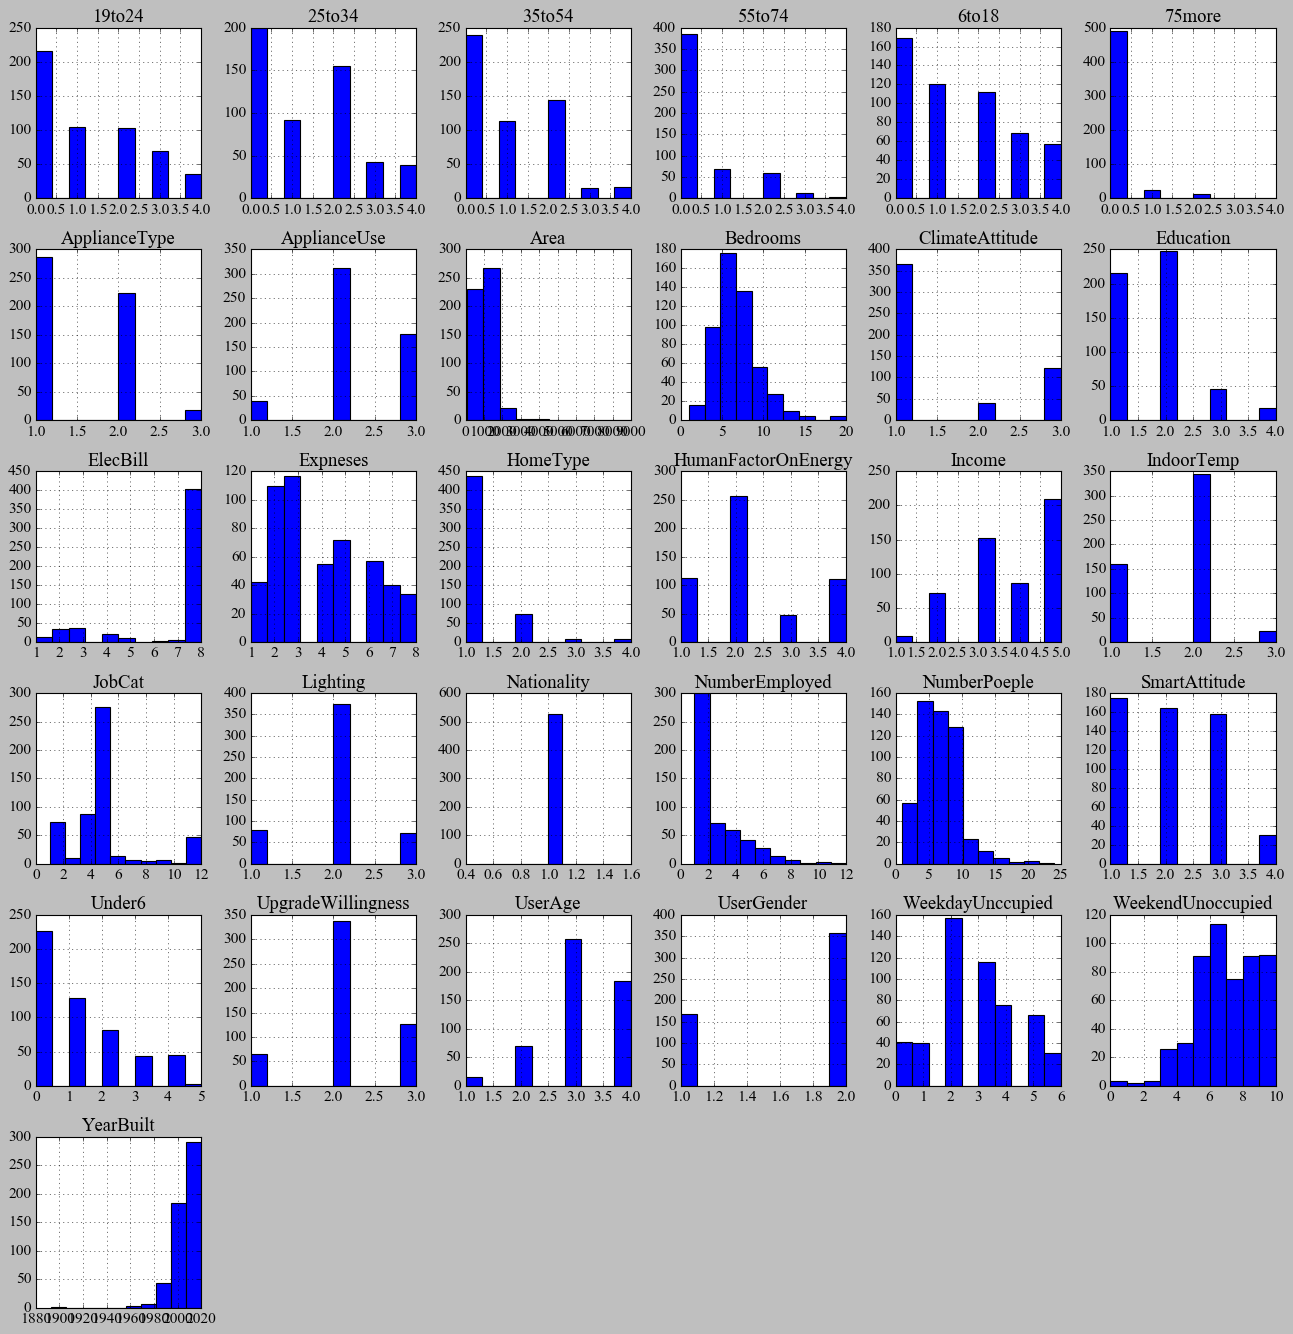

In [473]:
mpl.style.use('classic')
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.weight"] = "bold"
plt.rcParams["font.size"] = 14
Data_raw[Data_raw.Nationality ==1].dropna().hist(figsize=(20,20));

# NonCitizen Total

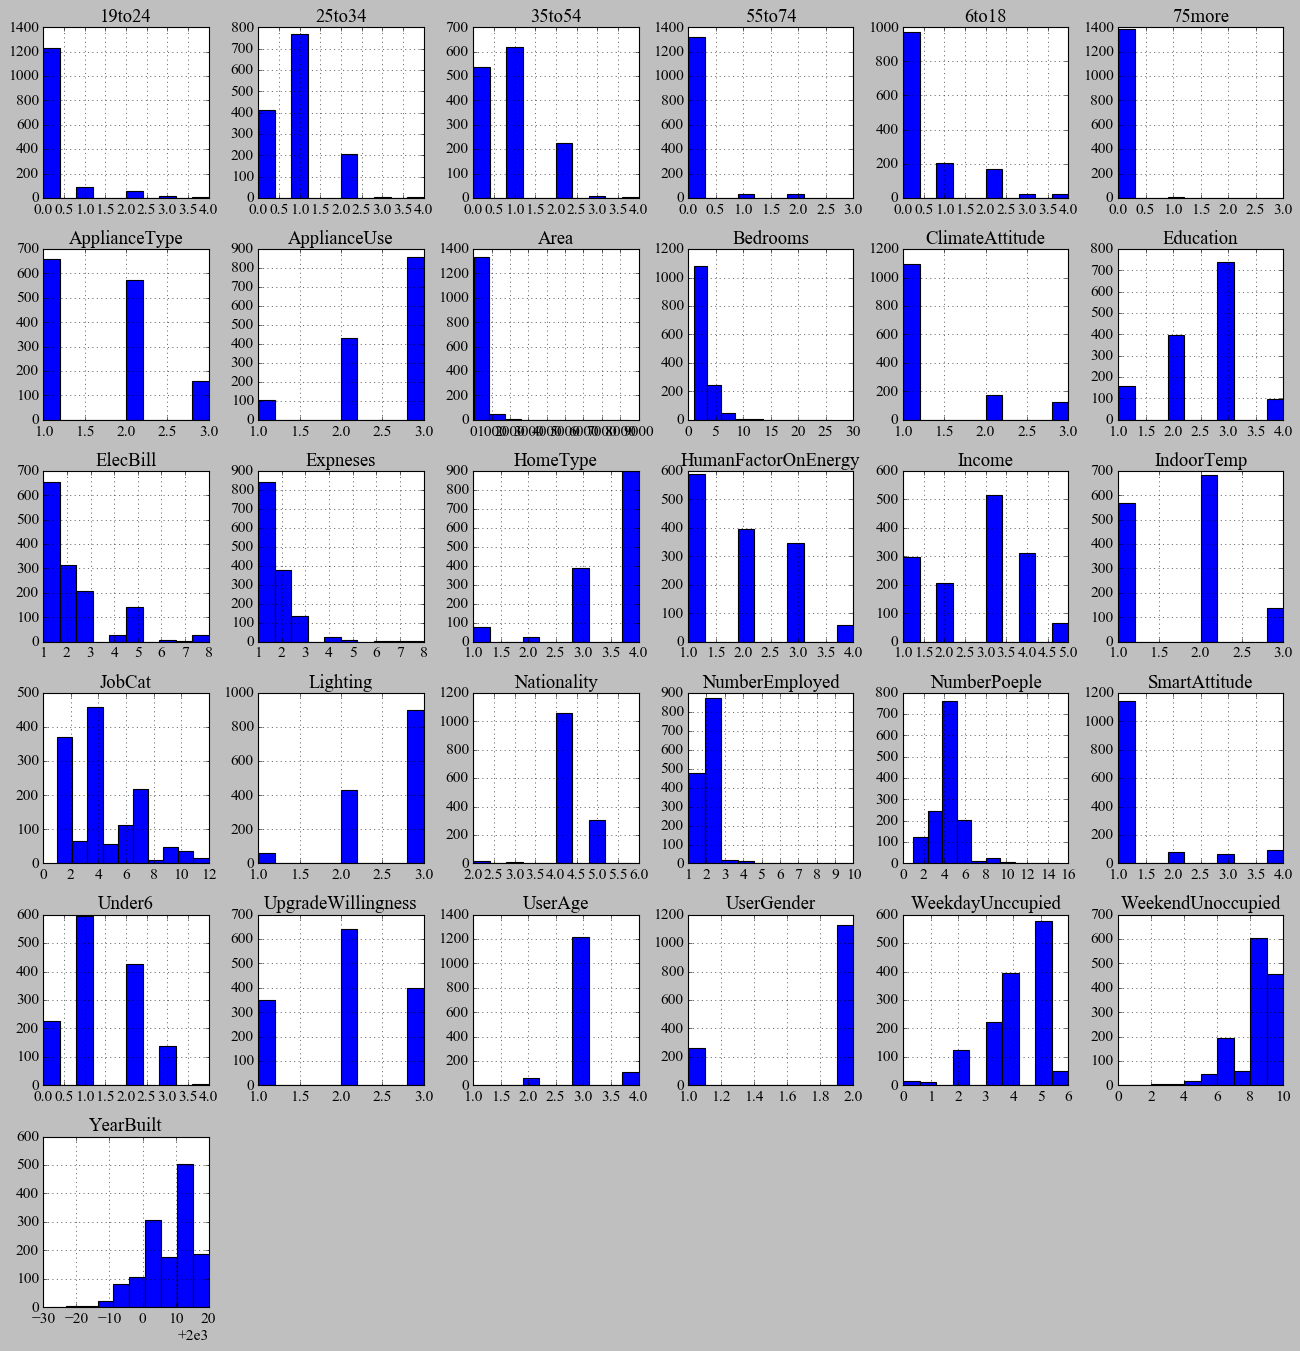

In [474]:
mpl.style.use('classic')
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.weight"] = "bold"
plt.rcParams["font.size"] = 14
Data_raw[Data_raw.Nationality!=1].dropna().hist(figsize=(20,20));

# Feature Importance for Energy consumption
## it seems that behavioral factors are more effective on energy bill

In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# X_behavior = ["ElecBill","IndoorTemp","Lighting","ApplianceUse",
#                       "UpgradeWillingness","SmartAttitude","ClimateAttitude",
#                       "WeekendUnoccupied","IndoorTemp","Lighting",
#                       "Expneses"]
# X_socio = ["UserAge","UserGender","Nationality","Education",
#                       "JobCat","Income"]

# X_tot = ["ElecBill","IndoorTemp","Lighting","ApplianceUse",
#                       "UpgradeWillingness","SmartAttitude","ClimateAttitude",
#                       "WeekendUnoccupied","IndoorTemp","Lighting",
#                       "Expneses", "UserAge","UserGender","Nationality","Education",
#                       "JobCat","Income"]

X_building = ["NumberPoeple","Area","Bedrooms","YearBuilt",
              "HomeType","ApplianceType","WeekdayUnccupied","WeekendUnoccupied"]

X_behavior = ["IndoorTemp","Lighting","ApplianceUse",
#               "UpgradeWillingness","SmartAttitude","ClimateAttitude",'Expneses']
              "UpgradeWillingness","SmartAttitude","ClimateAttitude"]

X_socio = ["UserAge","UserGender","Nationality","Education","Income"]

X_tot = ["NumberPoeple","Area","Bedrooms","YearBuilt",
         "HomeType","ApplianceType","WeekdayUnccupied",
         "WeekendUnoccupied","IndoorTemp","Lighting","ApplianceUse",
         "UpgradeWillingness","SmartAttitude","ClimateAttitude",'Expneses',
         "UserAge","UserGender","Nationality","Education","JobCat","Income"]
#ElecPerArea, ElecPerArea_cat
data_rand_forest = Data_raw[(Data_raw.ElecBill != 0)].dropna().reset_index().astype('int32').sample(frac=1)
X = data_rand_forest[X_behavior]
y = data_rand_forest["ElecBill"]
rnd_clf = RandomForestClassifier(n_estimators=50, n_jobs=-1)
rnd_clf.fit(X , y)
for name, score in zip(X_behavior, rnd_clf.feature_importances_):
    print(f"{name}: %{score*100}")
scores = cross_val_score(rnd_clf, X, y,
                         scoring="accuracy", cv=10)
scores.mean()

IndoorTemp: %21.398059619550814
Lighting: %15.68580940678587
ApplianceUse: %12.957370620880098
UpgradeWillingness: %23.047729180771448
SmartAttitude: %16.998419274929375
ClimateAttitude: %9.912611897082403


0.7347083469763531

In [87]:
from sklearn.tree import export_graphviz
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from graphviz import Source
X_building = ["NumberPoeple","Area","Bedrooms","YearBuilt",
              "HomeType","ApplianceType","WeekdayUnccupied","WeekendUnoccupied"]

X_behavior = ["IndoorTemp","Lighting","ApplianceUse",
#               "UpgradeWillingness","SmartAttitude","ClimateAttitude",'Expneses']
              "UpgradeWillingness","SmartAttitude","ClimateAttitude"]

X_socio = ["UserAge","UserGender","Nationality","Education","Income"]

X_tot = ["NumberPoeple","Area","Bedrooms","YearBuilt",
         "HomeType","ApplianceType","WeekdayUnccupied",
         "WeekendUnoccupied","IndoorTemp","Lighting","ApplianceUse",
         "UpgradeWillingness","SmartAttitude","ClimateAttitude",'Expneses',
         "UserAge","UserGender","Education","JobCat","Income"]

data_rand_forest = Data_raw[(Data_raw.ElecBill != 8)].dropna().reset_index().astype('int32').sample(frac=1)
X = data_rand_forest[X_behavior]
y = data_rand_forest["ElecBill"]
tree_clf = DecisionTreeClassifier(max_depth=4)
tree_clf.fit(X, y)
# export_graphviz(
#         tree_clf,
#         out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),
#         feature_names=X_tot,
#         class_names=["lessthan500","500To1000","1000to2000","2000to3000","3000to4500","4500to6000","larger6000"],
#         rounded=True, filled=True)
# Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot"))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [88]:
for name, score in zip(X_behavior, tree_clf.feature_importances_):
    print(f"{name}: %{score*100}")
scores = cross_val_score(tree_clf, X, y,
                         scoring="accuracy", cv=10)
scores.mean()

IndoorTemp: %38.748844599843615
Lighting: %5.993733200237876
ApplianceUse: %9.307280015515836
UpgradeWillingness: %32.06930641987511
SmartAttitude: %8.675149087531855
ClimateAttitude: %5.205686676995701


0.7156456249951341

# Feature Importance for Nationality

In [89]:
X_building = ["NumberPoeple","Area","Bedrooms","YearBuilt",
              "HomeType","ApplianceType","WeekdayUnccupied","WeekendUnoccupied"]

X_behavior = ["IndoorTemp","Lighting","ApplianceUse",
              "UpgradeWillingness","SmartAttitude","ClimateAttitude",'Expneses']

X_socio = ["UserAge","UserGender","Education","Income"]

X_tot = ["IndoorTemp","Lighting","ApplianceUse",
         "UpgradeWillingness","SmartAttitude","ClimateAttitude",'Expneses',
         "UserAge","UserGender","Education","JobCat","Income"]

data_rand_forest = Data_raw.dropna().reset_index().astype('int32').sample(frac=1)
X = data_rand_forest[X_behavior]
y = np.where(data_rand_forest.Nationality==1,1,0)
rnd_clf = RandomForestClassifier(n_estimators=50, n_jobs=-1)
rnd_clf.fit(X , y)
for name, score in zip(X_behavior, rnd_clf.feature_importances_):
    print(f"{name}: %{score*100}")
scores = cross_val_score(rnd_clf, X, y,
                         scoring="accuracy", cv=10)
scores.mean()
# export_graphviz(
#         tree_clf,
#         out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),
#         feature_names=X_behavior,
#         class_names=["Citizen","Non-Citizen"],
#         rounded=True, filled=True)
# Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot"))

IndoorTemp: %8.130802861477816
Lighting: %16.258795408719397
ApplianceUse: %7.321464601244175
UpgradeWillingness: %11.893009177525803
SmartAttitude: %17.078759984083298
ClimateAttitude: %5.127051423330396
Expneses: %34.19011654361911


0.9390426206494317

In [90]:
from sklearn.tree import export_graphviz
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from graphviz import Source
X_building = ["NumberPoeple","Area","Bedrooms","YearBuilt",
              "HomeType","ApplianceType","WeekdayUnccupied","WeekendUnoccupied"]

X_behavior = ["IndoorTemp","Lighting","ApplianceUse",
              "UpgradeWillingness","SmartAttitude","ClimateAttitude"]

X_socio = ["UserAge","UserGender","Nationality","Education","Income"]

X_tot = ["NumberPoeple","Area","Bedrooms","YearBuilt",
         "HomeType","ApplianceType","WeekdayUnccupied",
         "WeekendUnoccupied","IndoorTemp","Lighting","ApplianceUse",
         "UpgradeWillingness","SmartAttitude","ClimateAttitude",'Expneses',
         "UserAge","UserGender","Education","JobCat","Income"]

data_rand_forest = Data_raw[(Data_raw.ElecBill != 8)].dropna().reset_index().astype('int32').sample(frac=1)
X = data_rand_forest[X_behavior]
y = np.where(data_rand_forest.Nationality==1,1,0)
tree_clf = DecisionTreeClassifier(max_depth=4)
tree_clf.fit(X, y)
# export_graphviz(
#         tree_clf,
#         out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),
#         feature_names=X_tot,
#         class_names=["lessthan500","500To1000","1000to2000","2000to3000","3000to4500","4500to6000","larger6000"],
#         rounded=True, filled=True)
# Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot"))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [91]:
for name, score in zip(X_behavior, tree_clf.feature_importances_):
    print(f"{name}: %{score*100}")
scores = cross_val_score(tree_clf, X, y,
                         scoring="accuracy", cv=10)
scores.mean()

IndoorTemp: %9.904122667932509
Lighting: %20.496175829329676
ApplianceUse: %6.166948955771125
UpgradeWillingness: %46.67434596432468
SmartAttitude: %13.296187081786199
ClimateAttitude: %3.462219500855828


0.9347574218513814

# Clustering Behavioral Factors

In [92]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans(n_clusters=4, max_iter=500)

X_behavior = ["IndoorTemp","Lighting","ApplianceUse",
#               "UpgradeWillingness","SmartAttitude","ClimateAttitude",'Expneses']
              "UpgradeWillingness","SmartAttitude","ClimateAttitude"]


data_clustering = Data_raw.dropna().reset_index().astype('int32').sample(frac=1)
X = data_clustering[X_behavior]
kmeans.fit(X)
X.insert(0, 'CLUSTER1_LABEL', kmeans.labels_)

cl1_groups = X.groupby(['CLUSTER1_LABEL'])
cl1_groups.agg(lambda x:x.value_counts().index[0])

# visualizer = KElbowVisualizer(kmeans, k=(2,10))

# visualizer.fit(X)        # Fit the data to the visualizer
# visualizer.show()        # Finalize and render the figure

Attribute,IndoorTemp,Lighting,ApplianceUse,UpgradeWillingness,SmartAttitude,ClimateAttitude
CLUSTER1_LABEL,,,,,,
0,2,2,2,1,1,1
1,1,3,3,2,1,1
2,2,2,2,1,3,1
3,2,2,2,3,1,3


# Clustering Socioeconomy factors

In [93]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=7, max_iter=500)

X_socio = ["UserAge","UserGender","Nationality","Education","Income"]


data_clustering = Data_raw.dropna().reset_index().astype('int32').sample(frac=1)
X = data_clustering[X_socio]
kmeans.fit(X)
X.insert(0, 'CLUSTER1_LABEL', kmeans.labels_)

cl1_groups = X.groupby(['CLUSTER1_LABEL'])
cl1_groups.agg(lambda x:x.value_counts().index[0])

# visualizer = KElbowVisualizer(kmeans, k=(2,10))
# visualizer.fit(X)        # Fit the data to the visualizer
# visualizer.show()        # Finalize and render the figure

Attribute,UserAge,UserGender,Nationality,Education,Income
CLUSTER1_LABEL,,,,,
0,3,2,1,2,5
1,3,2,4,3,2
2,3,2,5,2,1
3,3,2,1,2,3
4,3,2,4,3,4
5,3,2,4,3,3
6,3,1,4,2,3


# Plotting Electricity Bills as 1D 

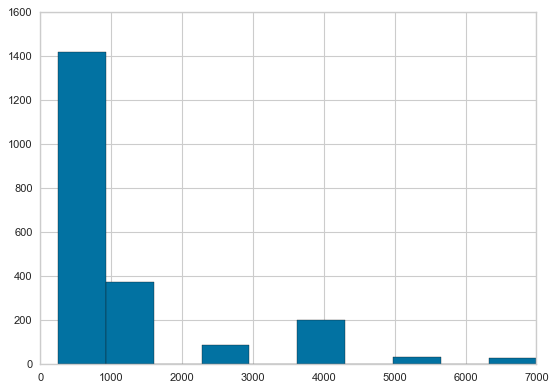

In [248]:
val = 0. # this is the value where you want the data to appear on the y-axis.
X = Data_raw[Data_raw['ElecBill']!=8]['ElecBill'].dropna() # just as an example array
mapping = {1:250,2:750,3:1500,4:2500,5:4000,6:5000,7:7000}
X = X.replace(mapping)
plt.hist(X)
plt.show()

In [94]:
# kmeans = KMeans(n_clusters=3, max_iter=500)
# X = pd.DataFrame(X.dropna().values.reshape((-1,1)))
# kmeans.fit(X)
# X.insert(0, 'CLUSTER1_LABEL', kmeans.labels_)
# cl1_groups = X.groupby(['CLUSTER1_LABEL'])
# cl1_groups.agg(lambda x:x.value_counts().index[0])
bill_mapping = {1:'a',2:'a',3:'b',4:'b',5:'c',6:'c',7:'c'}
bill_mapping_2 = {'a':1,'b':2,'c':3}
X_behavior = ["IndoorTemp","Lighting","ApplianceUse",
              "UpgradeWillingness","SmartAttitude","ClimateAttitude",'ElecBill','Expneses']
data_SPSS = Data_raw[(Data_raw.ElecBill != 8)]
data_SPSS = data_SPSS.replace({"ElecBill": bill_mapping})
data_SPSS = data_SPSS.replace({"ElecBill": bill_mapping_2})
data_SPSS = data_SPSS.dropna().astype('int32').reset_index()
data_SPSS = data_SPSS[X_behavior]

data_SPSS.to_excel('SPSS_input_ElecBill.xlsx')

In [95]:
data_SPSS.replace('ElecBill',bill_mapping)

Attribute,IndoorTemp,Lighting,ApplianceUse,UpgradeWillingness,SmartAttitude,ClimateAttitude,ElecBill,Expneses
0,2,1,2,2,1,1,2,3
1,2,1,2,1,4,2,3,3
2,1,3,3,1,1,3,3,3
3,1,3,1,1,2,1,3,8
4,3,1,1,3,2,1,3,4
...,...,...,...,...,...,...,...,...
1483,2,2,2,1,1,2,1,1
1484,2,2,2,1,1,2,1,1
1485,2,2,2,1,1,2,1,1
1486,2,2,2,1,1,2,1,1


# Regression to estimate annual loads

In [96]:
from sklearn.linear_model import LinearRegression
single_family_house = pd.read_excel('ConsVSArea.xlsx',sheet_name="Single_data")
apartment = pd.read_excel('ConsVSArea.xlsx',sheet_name="Condo_data")
ridge_reg_Single_House = LinearRegression()
X = single_family_house[['x1','x2']] #x1 area x2 temperature
y = single_family_house.y
ridge_reg_Single_House.fit(X, y)
ridge_reg_Single_House.score(X,y), ridge_reg_Single_House.intercept_, ridge_reg_Single_House.coef_

(0.961200631762498, 188.1707679883999, array([ 0.09475239, -7.57714735]))

In [97]:
ridge_reg_Condo = LinearRegression()
X = apartment[['x1','x2']]
y = apartment.y
ridge_reg_Condo.fit(X, y)
ridge_reg_Condo.score(X,y), ridge_reg_Condo.intercept_, ridge_reg_Condo.coef_

(0.9640003977796096, 484.89277617701134, array([  1.20656788, -18.10592115]))

# Estimate energy consumption for the sample

In [116]:
### jittering based on normal distribution
mapping1 = {1:'a',2:'a',3:'b',4:'b'}
mapping2 = {'a':1,'b':2}
data_HomeType = Data_raw.dropna().replace({"HomeType": mapping1})
data_HomeType = data_HomeType.replace({"HomeType": mapping2})
data_family_housing = data_HomeType[data_HomeType.HomeType == 1]
data_condo = data_HomeType[data_HomeType.HomeType == 2]
sigma = 1
data_family_housing['temp_values_scen1'] = data_family_housing['IndoorTemp']
data_family_housing['temp_values_scen2'] = data_family_housing['IndoorTemp']
data_family_housing['temp_values_scen3'] = data_family_housing['IndoorTemp']
data_family_housing['temp_values_scen4'] = data_family_housing['IndoorTemp']

data_condo['temp_values_scen1'] = data_condo['IndoorTemp']
data_condo['temp_values_scen2'] = data_condo['IndoorTemp']
data_condo['temp_values_scen3'] = data_condo['IndoorTemp']
data_condo['temp_values_scen4'] = data_condo['IndoorTemp']

#Scenario 1: Reference temperature preferences
data_family_housing['temp_values_scen1'] = data_family_housing.apply(lambda row: np.random.normal(21, sigma) if row['temp_values_scen1'] == 1 else row['temp_values_scen1'], axis=1)
data_family_housing['temp_values_scen1'] = data_family_housing.apply(lambda row: np.random.normal(23, sigma) if row['temp_values_scen1'] == 2 else row['temp_values_scen1'], axis=1)
data_family_housing['temp_values_scen1'] = data_family_housing.apply(lambda row: np.random.normal(25, sigma) if row['temp_values_scen1'] == 3 else row['temp_values_scen1'], axis=1)
family_housing_regres_input = data_family_housing[['Area','temp_values_scen1']]
data_family_housing['consumption_scen1'] = ridge_reg_Single_House.predict(family_housing_regres_input)

data_condo['temp_values_scen1'] = data_condo.apply(lambda row: np.random.normal(21, sigma) if row['temp_values_scen1'] == 1 else row['temp_values_scen1'], axis=1)
data_condo['temp_values_scen1'] = data_condo.apply(lambda row: np.random.normal(23, sigma) if row['temp_values_scen1'] == 2 else row['temp_values_scen1'], axis=1)
data_condo['temp_values_scen1'] = data_condo.apply(lambda row: np.random.normal(25, sigma) if row['temp_values_scen1'] == 3 else row['temp_values_scen1'], axis=1)
condo_regres_input = data_condo[['Area','temp_values_scen1']]
data_condo['consumption_scen1'] = ridge_reg_Condo.predict(condo_regres_input)
#Scenario 2: Cold preference switches to moderate
data_family_housing['temp_values_scen2'] = data_family_housing.apply(lambda row: np.random.normal(23, sigma) if row['temp_values_scen2'] == 1 else row['temp_values_scen2'], axis=1)
data_family_housing['temp_values_scen2'] = data_family_housing.apply(lambda row: np.random.normal(23, sigma) if row['temp_values_scen2'] == 2 else row['temp_values_scen2'], axis=1)
data_family_housing['temp_values_scen2'] = data_family_housing.apply(lambda row: np.random.normal(25, sigma) if row['temp_values_scen2'] == 3 else row['temp_values_scen2'], axis=1)
family_housing_regres_input = data_family_housing[['Area','temp_values_scen2']]
data_family_housing['consumption_scen2'] = ridge_reg_Single_House.predict(family_housing_regres_input)

data_condo['temp_values_scen2'] = data_condo.apply(lambda row: np.random.normal(23, sigma) if row['temp_values_scen2'] == 1 else row['temp_values_scen2'], axis=1)
data_condo['temp_values_scen2'] = data_condo.apply(lambda row: np.random.normal(23, sigma) if row['temp_values_scen2'] == 2 else row['temp_values_scen2'], axis=1)
data_condo['temp_values_scen2'] = data_condo.apply(lambda row: np.random.normal(25, sigma) if row['temp_values_scen2'] == 3 else row['temp_values_scen2'], axis=1)
condo_regres_input = data_condo[['Area','temp_values_scen2']]
data_condo['consumption_scen2'] = ridge_reg_Condo.predict(condo_regres_input)
#Scenario 3: Cold preference switches to moderate and moderate switches to hot
data_family_housing['temp_values_scen3'] = data_family_housing.apply(lambda row: np.random.normal(23, sigma) if row['temp_values_scen3'] == 1 else row['temp_values_scen3'], axis=1)
data_family_housing['temp_values_scen3'] = data_family_housing.apply(lambda row: np.random.normal(25, sigma) if row['temp_values_scen3'] == 2 else row['temp_values_scen3'], axis=1)
data_family_housing['temp_values_scen3'] = data_family_housing.apply(lambda row: np.random.normal(25, sigma) if row['temp_values_scen3'] == 3 else row['temp_values_scen3'], axis=1)
family_housing_regres_input = data_family_housing[['Area','temp_values_scen3']]
data_family_housing['consumption_scen3'] = ridge_reg_Single_House.predict(family_housing_regres_input)

data_condo['temp_values_scen3'] = data_condo.apply(lambda row: np.random.normal(23, sigma) if row['temp_values_scen3'] == 1 else row['temp_values_scen3'], axis=1)
data_condo['temp_values_scen3'] = data_condo.apply(lambda row: np.random.normal(25, sigma) if row['temp_values_scen3'] == 2 else row['temp_values_scen3'], axis=1)
data_condo['temp_values_scen3'] = data_condo.apply(lambda row: np.random.normal(25, sigma) if row['temp_values_scen3'] == 3 else row['temp_values_scen3'], axis=1)
condo_regres_input = data_condo[['Area','temp_values_scen3']]
data_condo['consumption_scen3'] = ridge_reg_Condo.predict(condo_regres_input)

#Scenario 3: Cold preference switches to moderate and moderate switches to hot
data_family_housing['temp_values_scen4'] = data_family_housing.apply(lambda row: np.random.normal(25, sigma) if row['temp_values_scen4'] == 1 else row['temp_values_scen4'], axis=1)
data_family_housing['temp_values_scen4'] = data_family_housing.apply(lambda row: np.random.normal(25, sigma) if row['temp_values_scen4'] == 2 else row['temp_values_scen4'], axis=1)
data_family_housing['temp_values_scen4'] = data_family_housing.apply(lambda row: np.random.normal(25, sigma) if row['temp_values_scen4'] == 3 else row['temp_values_scen4'], axis=1)
family_housing_regres_input = data_family_housing[['Area','temp_values_scen4']]
data_family_housing['consumption_scen4'] = ridge_reg_Single_House.predict(family_housing_regres_input)

data_condo['temp_values_scen4'] = data_condo.apply(lambda row: np.random.normal(25, sigma) if row['temp_values_scen4'] == 1 else row['temp_values_scen4'], axis=1)
data_condo['temp_values_scen4'] = data_condo.apply(lambda row: np.random.normal(25, sigma) if row['temp_values_scen4'] == 2 else row['temp_values_scen4'], axis=1)
data_condo['temp_values_scen4'] = data_condo.apply(lambda row: np.random.normal(25, sigma) if row['temp_values_scen4'] == 3 else row['temp_values_scen4'], axis=1)
condo_regres_input = data_condo[['Area','temp_values_scen4']]
data_condo['consumption_scen4'] = ridge_reg_Condo.predict(condo_regres_input)

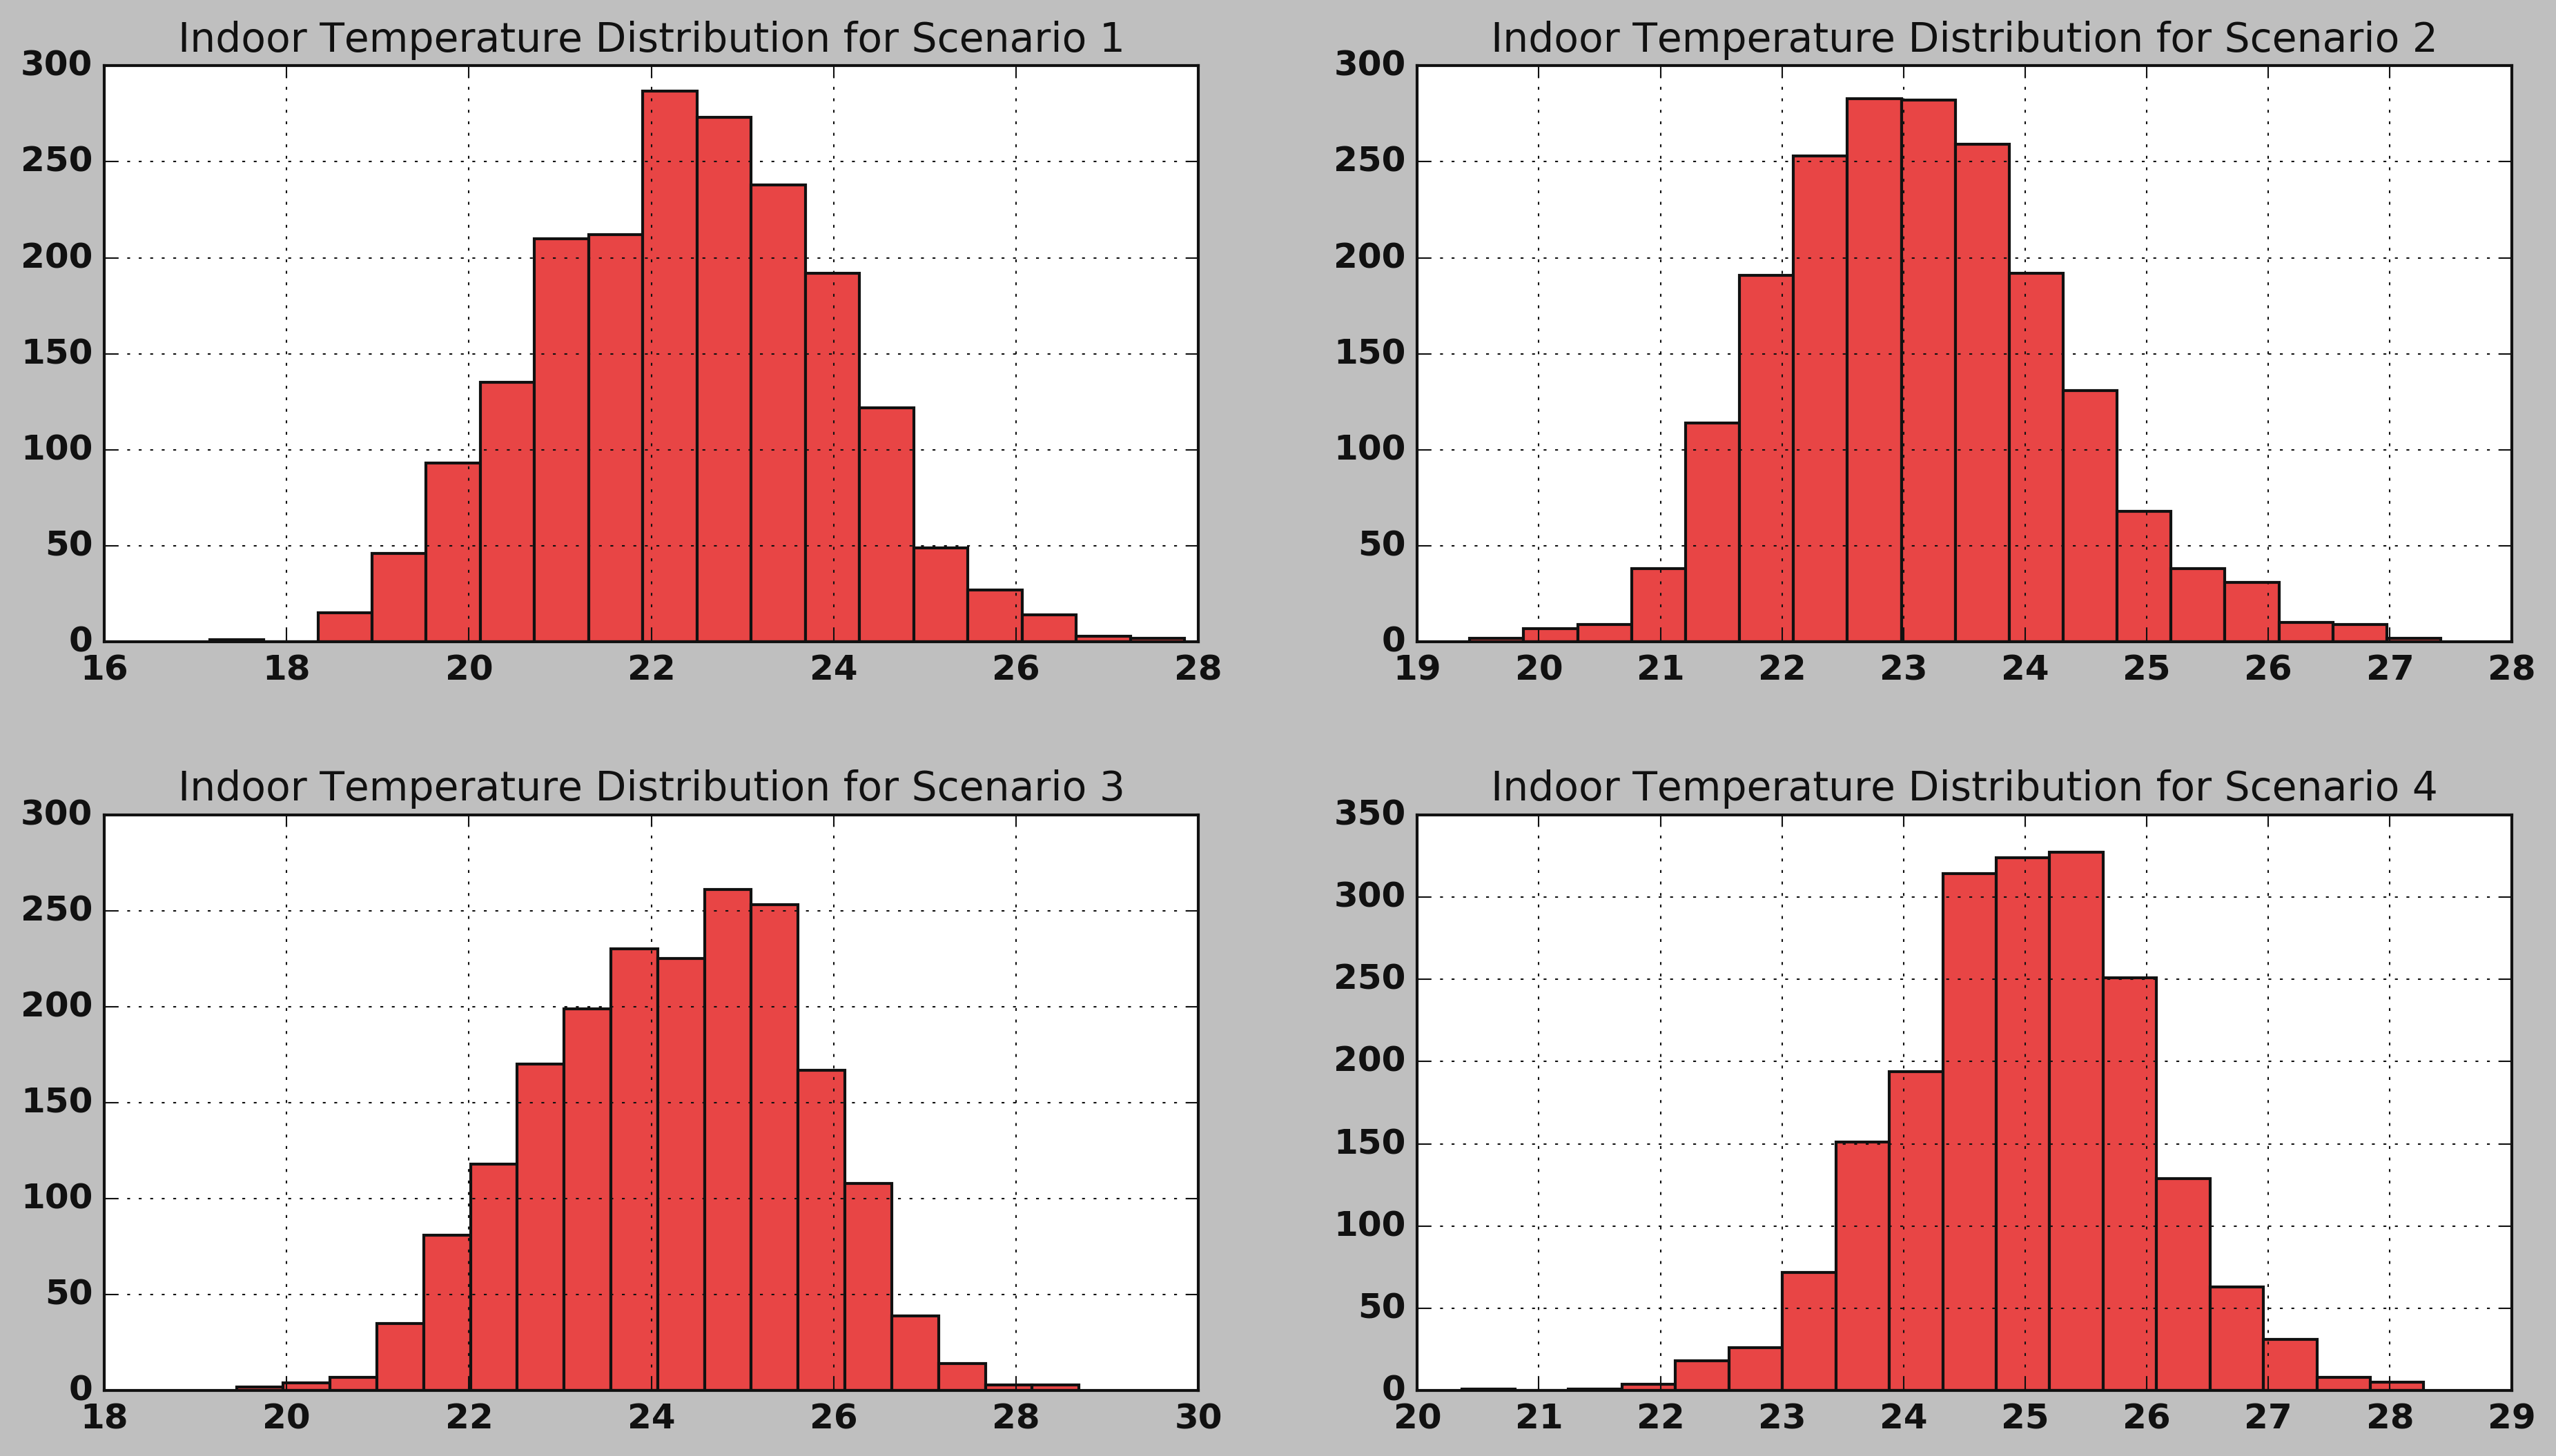

In [117]:
mpl.style.use('classic')
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.weight"] = "bold"
plt.rcParams["font.size"] = 12
plt.rcParams["axes.labelweight"] = "bold"
f = plt.figure(figsize=(15,8), dpi=300)
f.tight_layout()
data_random_temp1 = np.concatenate((data_family_housing['temp_values_scen1'],data_condo['temp_values_scen1']), axis=0)
data_random_temp2 = np.concatenate((data_family_housing['temp_values_scen2'],data_condo['temp_values_scen2']), axis=0)
data_random_temp3 = np.concatenate((data_family_housing['temp_values_scen3'],data_condo['temp_values_scen3']), axis=0)
data_random_temp4 = np.concatenate((data_family_housing['temp_values_scen4'],data_condo['temp_values_scen4']), axis=0)

ax1 = f.add_subplot(221)
ax1.hist(data_random_temp1, bins=18, fc='#E84545')
ax1.grid()
ax1.set_title('Indoor Temperature Distribution for Scenario 1',size=14)

ax2 = f.add_subplot(222)
ax2.hist(data_random_temp2, bins=18, fc='#E84545')
ax2.grid()
ax2.set_title('Indoor Temperature Distribution for Scenario 2',size=14)

ax3 = f.add_subplot(223)
ax3.hist(data_random_temp3, bins=18, fc='#E84545')
ax3.grid()
ax3.set_title('Indoor Temperature Distribution for Scenario 3',size=14)

ax4 = f.add_subplot(224)
ax4.hist(data_random_temp4, bins=18, fc='#E84545')
ax4.grid()
ax4.set_title('Indoor Temperature Distribution for Scenario 4',size=14)
plt.subplots_adjust(hspace=0.3)
plt.show()
f.savefig('Figure13.jpeg', dpi=600, bbox_inches="tight", pad_inches= 0)

In [101]:
Total_Consumption_Scen1 = np.sum(data_condo['consumption_scen1']) +  np.sum(data_family_housing['consumption_scen1'])
Total_Consumption_Scen2 = np.sum(data_condo['consumption_scen2']) +  np.sum(data_family_housing['consumption_scen2'])
Total_Consumption_Scen3 = np.sum(data_condo['consumption_scen3']) +  np.sum(data_family_housing['consumption_scen3'])
Total_Consumption_Scen4 = np.sum(data_condo['consumption_scen4']) +  np.sum(data_family_housing['consumption_scen4'])

In [102]:
Total_Consumption_Scen1-Total_Consumption_Scen4

73125.8963081133

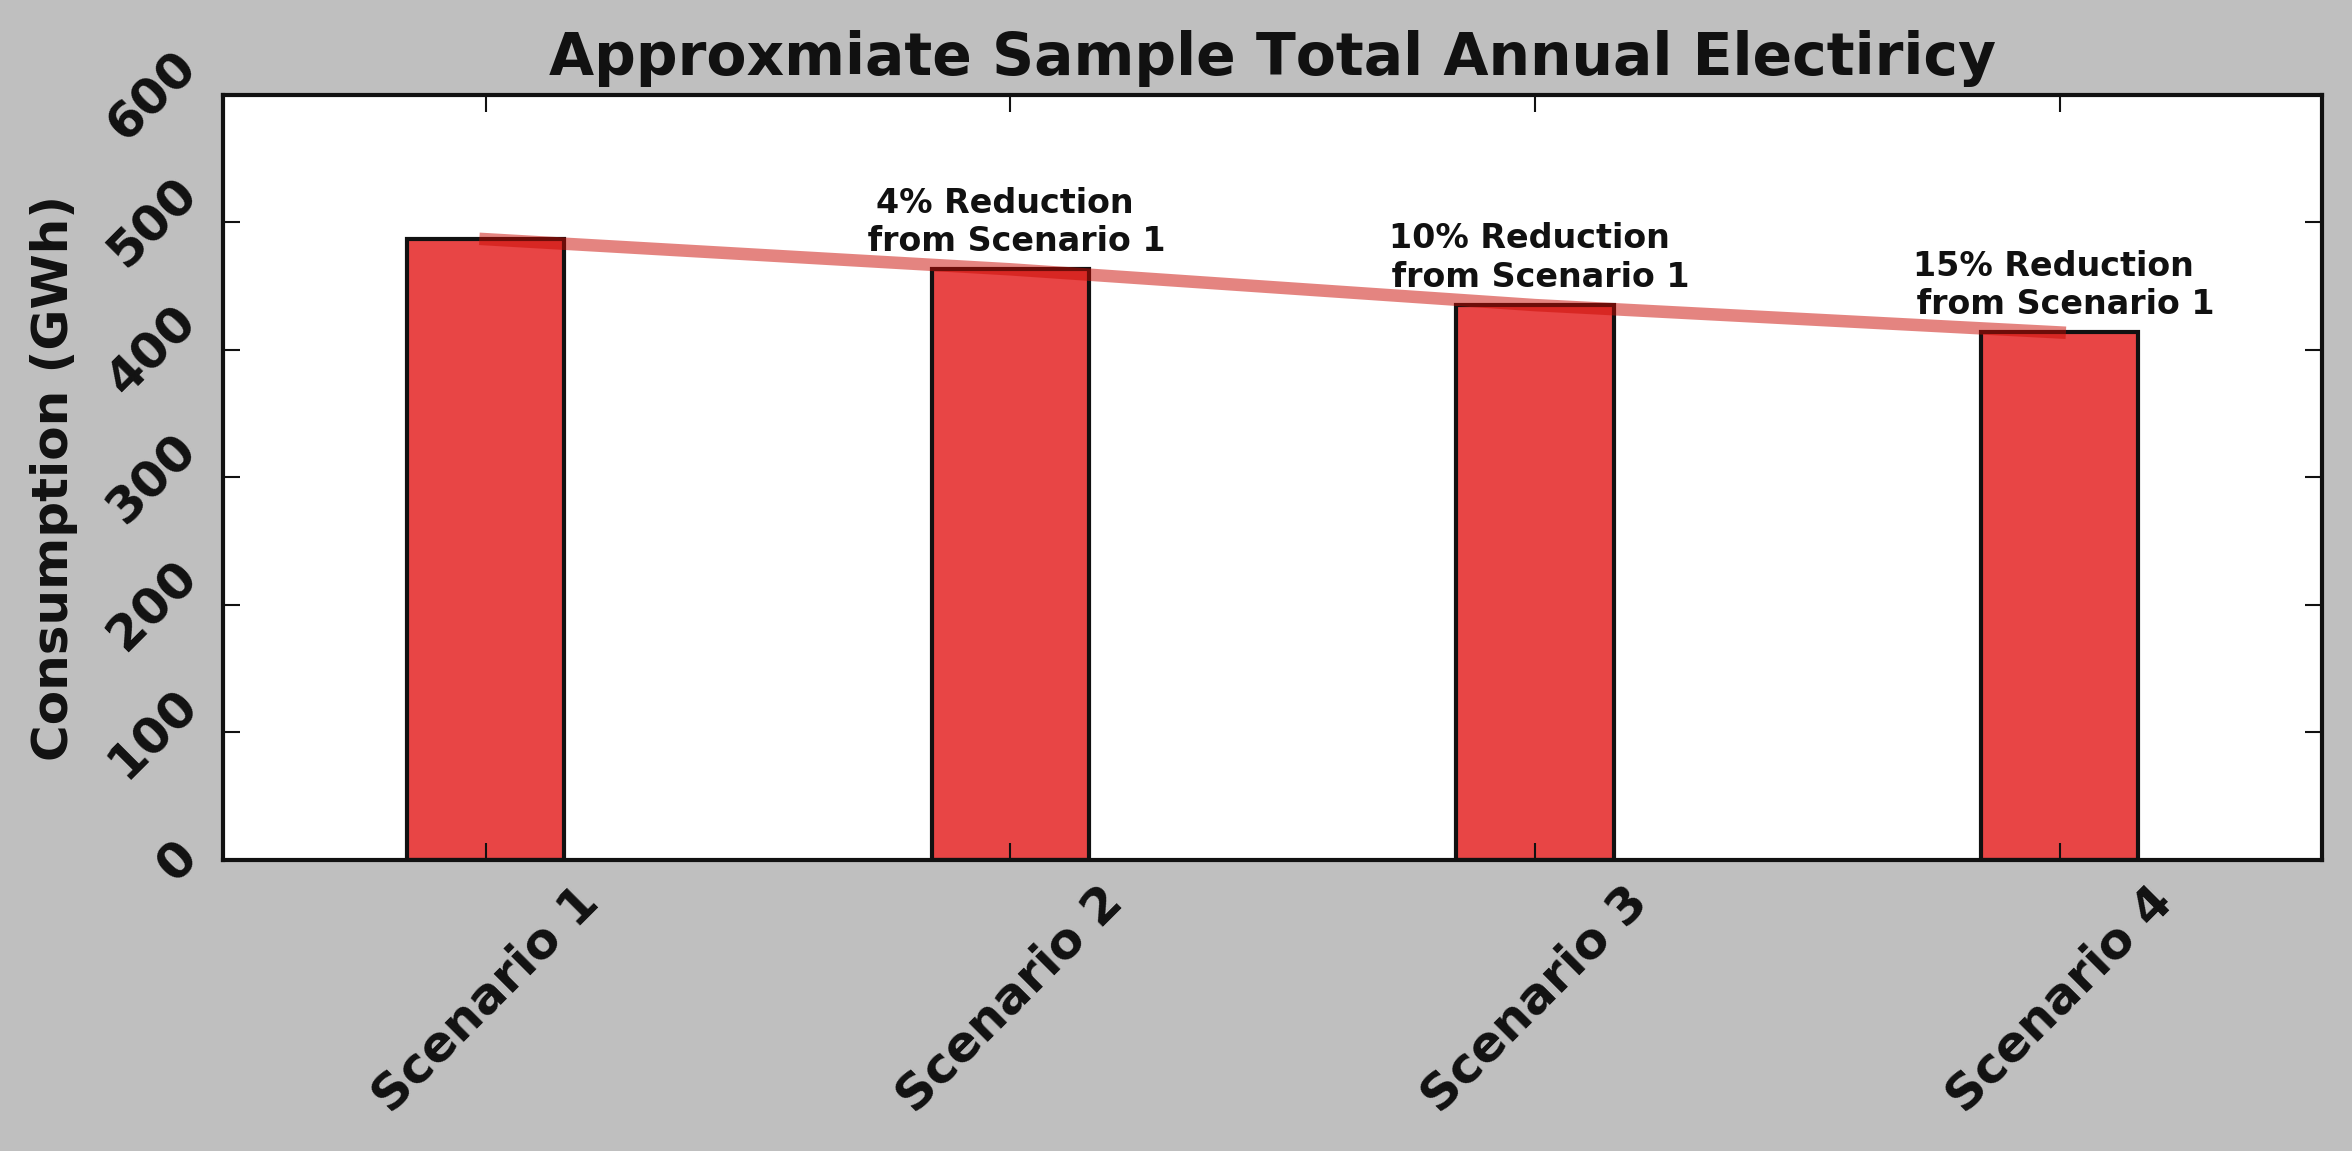

In [104]:
## Plotting Consumptions for the 4 scenarios:
mpl.style.use('classic')
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.weight"] = "bold"
plt.rcParams["font.size"] = 12
plt.rcParams["axes.labelweight"] = "bold"

fig, axes = plt.subplots(figsize=(8,4),dpi=300)
df = [Total_Consumption_Scen1/1000,Total_Consumption_Scen2/1000,Total_Consumption_Scen3/1000,Total_Consumption_Scen4/1000]
labels = ['Scenario 1','Scenario 2','Scenario 3','Scenario 4']
width = 0.3
x = (labels)
rects1 = axes.bar(x, df, width, color="#E84545")
axes.plot(x, df, linewidth=3,color="r",alpha=0.5)
axes.set_title('Approxmiate Sample Total Annual Electiricy',size=14,fontweight='bold')
axes.set_ylabel('Consumption (GWh)')
axes.tick_params(axis='both',labelrotation=45)
axes.set_xticklabels(labels)
axes.set_xlim([-0.5, 3.5])
axes.set_ylim([0, 600])

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for i, rect in enumerate(rects):
        height = rect.get_height()
        if i != 0:
            axes.annotate('{}% Reduction \n from Scenario 1'.format(int((df[0]-df[i])/df[0] * 100)),
                                                 xy=(rect.get_x() + rect.get_width() / 2, height),
                                                 xytext=(0, 3),  # 3 points vertical offset
                                                 textcoords="offset points",
                                                 ha='center', va='bottom', size=8)

autolabel(rects1)
plt.savefig('Figure14.jpeg', dpi=300, bbox_inches="tight", pad_inches= 0)
fig.tight_layout()
plt.show()

# Kernel Density Estimation

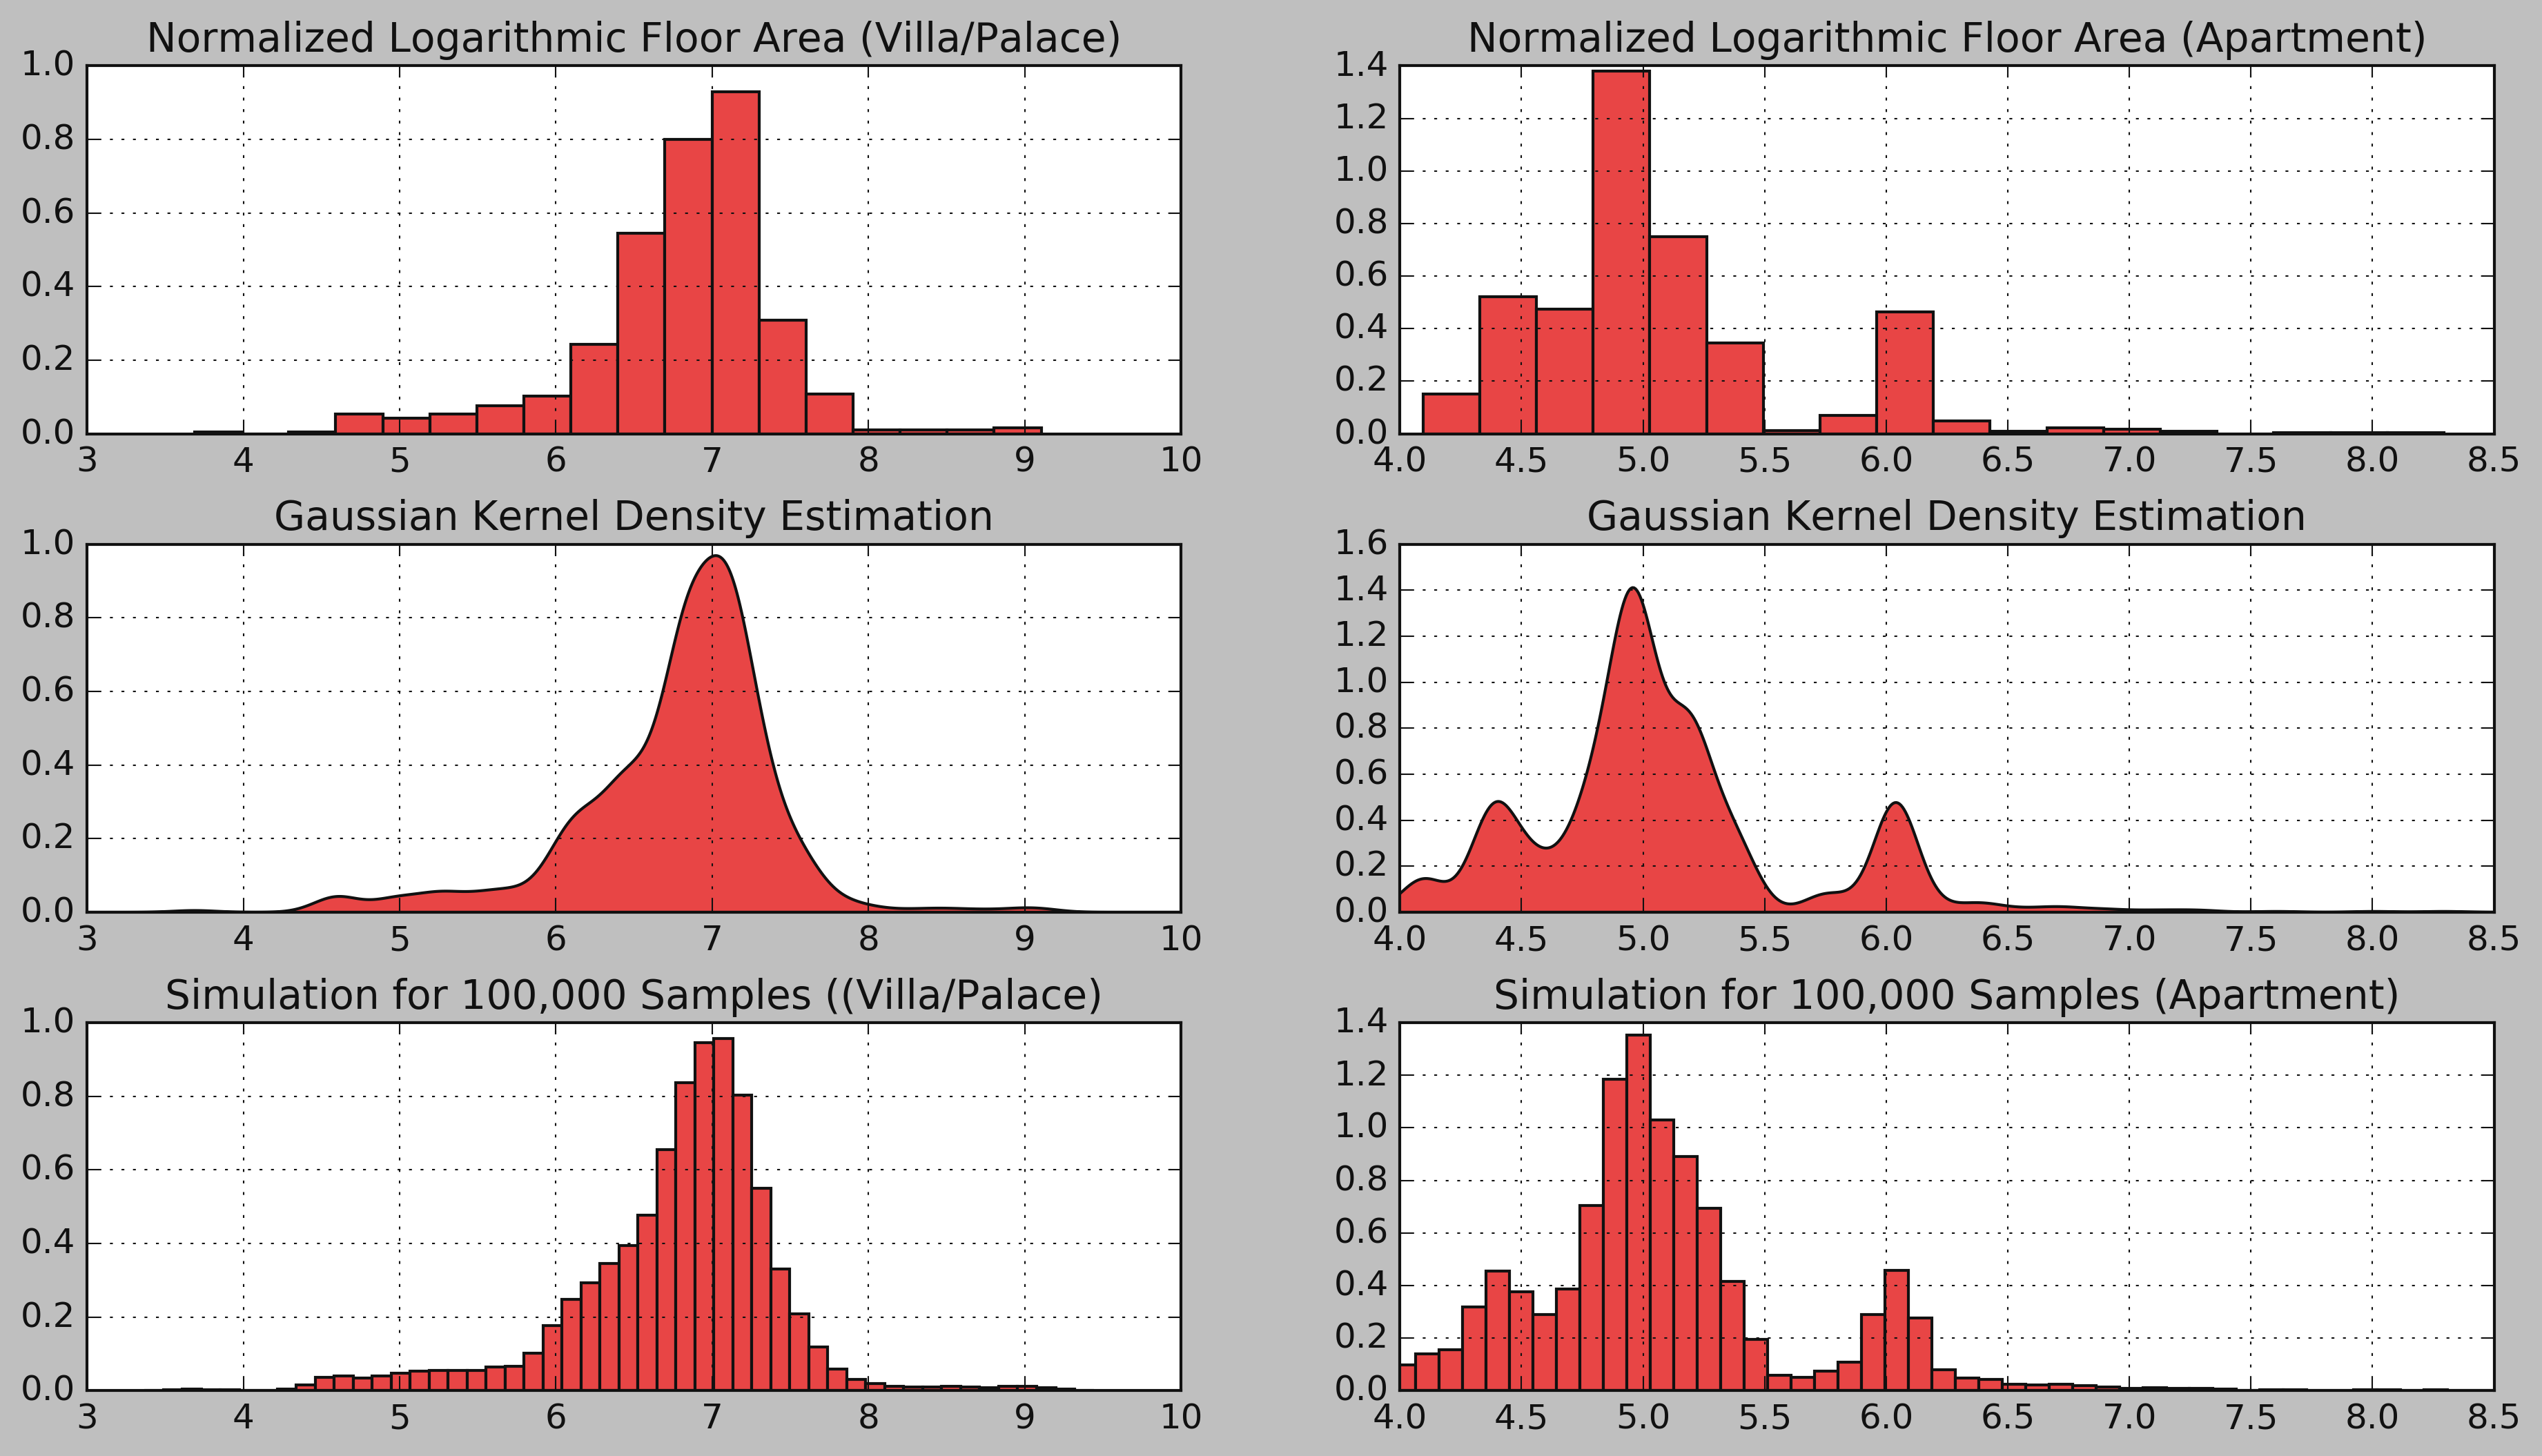

In [106]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from distutils.version import LooseVersion
from scipy.stats import norm
from sklearn.neighbors import KernelDensity
if LooseVersion(matplotlib.__version__) >= '2.1':
    density_param = {'density': True}
else:
    density_param = {'normed': True}
from matplotlib.font_manager import FontProperties
mpl.style.use('classic')
plt.rcParams["font.family"] = "sans-serif"
#plt.rcParams["font.weight"] = "bold"
plt.rcParams["font.size"] = 12
plt.rcParams["axes.labelweight"] = "bold"
Feature = "Area"
mapping1 = {1:'a',2:'a',3:'b',4:'b'}
mapping2 = {'a':1,'b':2}
data_HomeType = Data_raw.dropna().replace({"HomeType": mapping1})
data_HomeType = data_HomeType.replace({"HomeType": mapping2})
data_family_housing = data_HomeType[data_HomeType.HomeType == 1]
data_condo = data_HomeType[data_HomeType.HomeType == 2]
df_familyHousing = (data_family_housing[Feature])
df_condo = (data_condo[Feature])
bandwidth = 0.12
###Kernel estimation for area family housing
X_family_housing = np.log(df_familyHousing).values[:, np.newaxis]
X_plot_family_housing = np.linspace(np.min(X_family_housing) - 1, 
                                    np.max(X_family_housing) + 1, 1000)[:, np.newaxis]
kde_family_housing = KernelDensity(kernel='gaussian', bandwidth=.14).fit(X_family_housing)
log_dens_family_housing = kde_family_housing.score_samples(X_plot_family_housing)


###Kernel estimation for area condo 
X_apartment = np.log(df_condo).values[:, np.newaxis]
X_plot_apartment = np.linspace(np.min(X_apartment) - 1, 
                                    np.max(X_apartment) + 1, 1000)[:, np.newaxis]
kde_apartment = KernelDensity(kernel='gaussian', bandwidth=.09).fit(X_apartment)
log_dens_apartment = kde_apartment.score_samples(X_plot_apartment)
#########################
# Area Family Housing

f = plt.figure(figsize=(15,8), dpi=300)
f.tight_layout()
ax1 = f.add_subplot(321)
ax1.hist(X_family_housing[:, 0], bins=18, fc='#E84545', **density_param)
ax1.grid()
# ax1.set_xlim([0, 3000])
# ax1.set_ylabel('Frequency')
ax1.set_title('Normalized Logarithmic Floor Area (Villa/Palace)',size=14)#,fontweight='bold')

# Area Apartment
ax2 = f.add_subplot(322)
ax2.hist(X_apartment[:, 0], bins=18, fc='#E84545', **density_param)
ax2.grid()
# ax2.set_xlim([0, 399])
ax2.set_title('Normalized Logarithmic Floor Area (Apartment)',size=14)#,fontweight='bold')
#ax2.set_ylabel('Frequency')

#########################
# Housing Kernel Density Estimation

ax3 = f.add_subplot(323)
ax3.fill(X_plot_family_housing[:, 0], np.exp(log_dens_family_housing), fc='#E84545')
ax3.grid()
#ax3.set_xlim([1970, 2022])
ax3.ticklabel_format(useOffset=False)
ax3.set_title('Gaussian Kernel Density Estimation',size=14)#,fontweight='bold')
ax3.set_xlim([3, 10])
#ax3.set_ylabel('Frequency')

# Apartment Kernel Density Estimation
ax4 = f.add_subplot(324)
ax4.fill(X_plot_apartment[:, 0], np.exp(log_dens_apartment), fc='#E84545')
ax4.grid()
ax4.set_xlim([4, 8.5])
ax4.ticklabel_format(useOffset=False)
ax4.set_title('Gaussian Kernel Density Estimation',size=14)#,fontweight='bold')
#ax4.set_ylabel('Frequency')

X_family_housing_simulated = kde_apartment.sample(100000)
ax5 = f.add_subplot(326)
ax5.hist(X_family_housing_simulated[:, 0], bins=50, fc='#E84545', **density_param)
ax5.grid()
ax5.set_xlim([4, 8.5])

# ax1.set_xlim([0, 3000])
# ax1.set_ylabel('Frequency')
ax5.set_title('Simulation for 100,000 Samples (Apartment)',size=14)#,fontweight='bold')

# Area Apartment
ax6 = f.add_subplot(325)
X_Apartment_simulated = kde_family_housing.sample(100000)
ax6.hist(X_Apartment_simulated[:, 0], bins=50, fc='#E84545', **density_param)
ax6.grid()
ax6.set_xlim([3, 10])

# ax2.set_xlim([0, 399])
ax6.set_title('Simulation for 100,000 Samples ((Villa/Palace)',size=14)#,fontweight='bold')
#ax2.set_ylabel('Frequency')
plt.subplots_adjust(hspace=0.3)
plt.show()
f.savefig('Figure15.jpeg', dpi=600, bbox_inches="tight", pad_inches= 0)


# Generating Random Values

In [109]:
# elements = [1.1, 2.2, 3.3]
# probabilities = [0.2, 0.5, 0.3]
# np.random.choice(elements, 10, p=probabilities)
#Apartment random variable
mapping1 = {1:'a',2:'a',3:'b',4:'b'}
mapping2 = {'a':1,'b':2}
data_HomeType = Data_raw.dropna().replace({"HomeType": mapping1})
data_HomeType = data_HomeType.replace({"HomeType": mapping2})
data_HomeType = data_HomeType['HomeType']
probabilities_hometype = data_HomeType.value_counts()/len(data_HomeType)
probabilities_hometype = [probabilities_hometype[1],probabilities_hometype[2]]



columns = ['HomeType', 'Area', 'IndoorTemp', 'temp_values_scen1',
           'temp_values_scen2', 'temp_values_scen3', 'temp_values_scen4',
           'consumption_scen1', 'consumption_scen2', 'consumption_scen3',
           'consumption_scen4']
Population_size = int(150e3)
Data_aggregate = pd.DataFrame(np.zeros((Population_size,len(columns))), columns=columns)

elements_hometype = [1,2]
hometype_simulation = np.random.choice(elements_hometype, 1, p=probabilities_hometype)[0]

# data_family_housing['temp_values_scen4'] = data_family_housing.apply(
#     lambda row: np.random.normal(25, sigma) if row['temp_values_scen4'] 
#     == 1 else row['temp_values_scen4'], axis=1)

Data_aggregate['HomeType'] = Data_aggregate.apply(
    lambda row: np.random.choice(elements_hometype, 1, p=probabilities_hometype)[0], axis=1)

Data_aggregate['Area'] = Data_aggregate.apply(
    lambda row: np.exp(kde_family_housing.sample(1))[0,0] if row['HomeType'] 
    == 1 else np.exp(kde_apartment.sample(1))[0,0], axis=1)

In [111]:
data_Temp = Data_raw.dropna()['IndoorTemp']
probabilities_Temp = data_Temp.value_counts()/len(data_Temp)
probabilities_Temp = [probabilities_Temp[1],probabilities_Temp[2],probabilities_Temp[3]]
elements_Temp = [1,2,3]
Temperaure_simulation = np.random.choice(elements_Temp, 1, p=probabilities_Temp)
Data_aggregate['IndoorTemp'] = Data_aggregate.apply(
    lambda row: np.random.choice(elements_Temp, 1, p=probabilities_Temp)[0], axis=1)

In [112]:
Data_aggregate['Area'] = Data_aggregate.apply(lambda row: np.random.uniform(200, 900) if row['Area'] > 1300 else row['Area'], axis=1)

In [113]:
Data_aggregate['temp_values_scen1'] = Data_aggregate['IndoorTemp']
Data_aggregate['temp_values_scen2'] = Data_aggregate['IndoorTemp']
Data_aggregate['temp_values_scen3'] = Data_aggregate['IndoorTemp']
Data_aggregate['temp_values_scen4'] = Data_aggregate['IndoorTemp']

Data_aggregate['temp_values_scen1'] = Data_aggregate.apply(lambda row: np.random.normal(21, sigma) if row['temp_values_scen1'] == 1 else row['temp_values_scen1'], axis=1)
Data_aggregate['temp_values_scen1'] = Data_aggregate.apply(lambda row: np.random.normal(23, sigma) if row['temp_values_scen1'] == 2 else row['temp_values_scen1'], axis=1)
Data_aggregate['temp_values_scen1'] = Data_aggregate.apply(lambda row: np.random.normal(25, sigma) if row['temp_values_scen1'] == 3 else row['temp_values_scen1'], axis=1)

Data_aggregate['temp_values_scen2'] = Data_aggregate.apply(lambda row: np.random.normal(23, sigma) if row['temp_values_scen2'] == 1 else row['temp_values_scen2'], axis=1)
Data_aggregate['temp_values_scen2'] = Data_aggregate.apply(lambda row: np.random.normal(23, sigma) if row['temp_values_scen2'] == 2 else row['temp_values_scen2'], axis=1)
Data_aggregate['temp_values_scen2'] = Data_aggregate.apply(lambda row: np.random.normal(25, sigma) if row['temp_values_scen2'] == 3 else row['temp_values_scen2'], axis=1)

Data_aggregate['temp_values_scen3'] = Data_aggregate.apply(lambda row: np.random.normal(23, sigma) if row['temp_values_scen3'] == 1 else row['temp_values_scen3'], axis=1)
Data_aggregate['temp_values_scen3'] = Data_aggregate.apply(lambda row: np.random.normal(25, sigma) if row['temp_values_scen3'] == 2 else row['temp_values_scen3'], axis=1)
Data_aggregate['temp_values_scen3'] = Data_aggregate.apply(lambda row: np.random.normal(25, sigma) if row['temp_values_scen3'] == 3 else row['temp_values_scen3'], axis=1)

Data_aggregate['temp_values_scen4'] = Data_aggregate.apply(lambda row: np.random.normal(25, sigma) if row['temp_values_scen4'] == 1 else row['temp_values_scen4'], axis=1)
Data_aggregate['temp_values_scen4'] = Data_aggregate.apply(lambda row: np.random.normal(25, sigma) if row['temp_values_scen4'] == 2 else row['temp_values_scen4'], axis=1)
Data_aggregate['temp_values_scen4'] = Data_aggregate.apply(lambda row: np.random.normal(25, sigma) if row['temp_values_scen4'] == 3 else row['temp_values_scen4'], axis=1)

columns = ['HomeType', 'Area', 'IndoorTemp', 'temp_values_scen1',
           'temp_values_scen2', 'temp_values_scen3', 'temp_values_scen4',
           'consumption_scen1', 'consumption_scen2', 'consumption_scen3',
           'consumption_scen4']

Data_aggregate['consumption_scen1'] = Data_aggregate.apply(lambda row:
                                                           ridge_reg_Single_House.predict(np.array([row[['Area','temp_values_scen1']]]))[0] 
                                                                                             if row['HomeType'] == 1 else 
                                                                                             ridge_reg_Condo.predict(np.array([row[['Area','temp_values_scen1']]]))[0], 
                                                                                             axis=1)
Data_aggregate['consumption_scen2'] = Data_aggregate.apply(lambda row:
                                                           ridge_reg_Single_House.predict(np.array([row[['Area','temp_values_scen2']]]))[0] 
                                                                                             if row['HomeType'] == 1 else 
                                                                                             ridge_reg_Condo.predict(np.array([row[['Area','temp_values_scen2']]]))[0], 
                                                                                             axis=1)
Data_aggregate['consumption_scen3'] = Data_aggregate.apply(lambda row:
                                                           ridge_reg_Single_House.predict(np.array([row[['Area','temp_values_scen3']]]))[0] 
                                                                                             if row['HomeType'] == 1 else 
                                                                                             ridge_reg_Condo.predict(np.array([row[['Area','temp_values_scen3']]]))[0], 
                                                                                             axis=1)
Data_aggregate['consumption_scen4'] = Data_aggregate.apply(lambda row:
                                                           ridge_reg_Single_House.predict(np.array([row[['Area','temp_values_scen4']]]))[0] 
                                                                                             if row['HomeType'] == 1 else 
                                                                                             ridge_reg_Condo.predict(np.array([row[['Area','temp_values_scen4']]]))[0], 
                                                                                             axis=1)



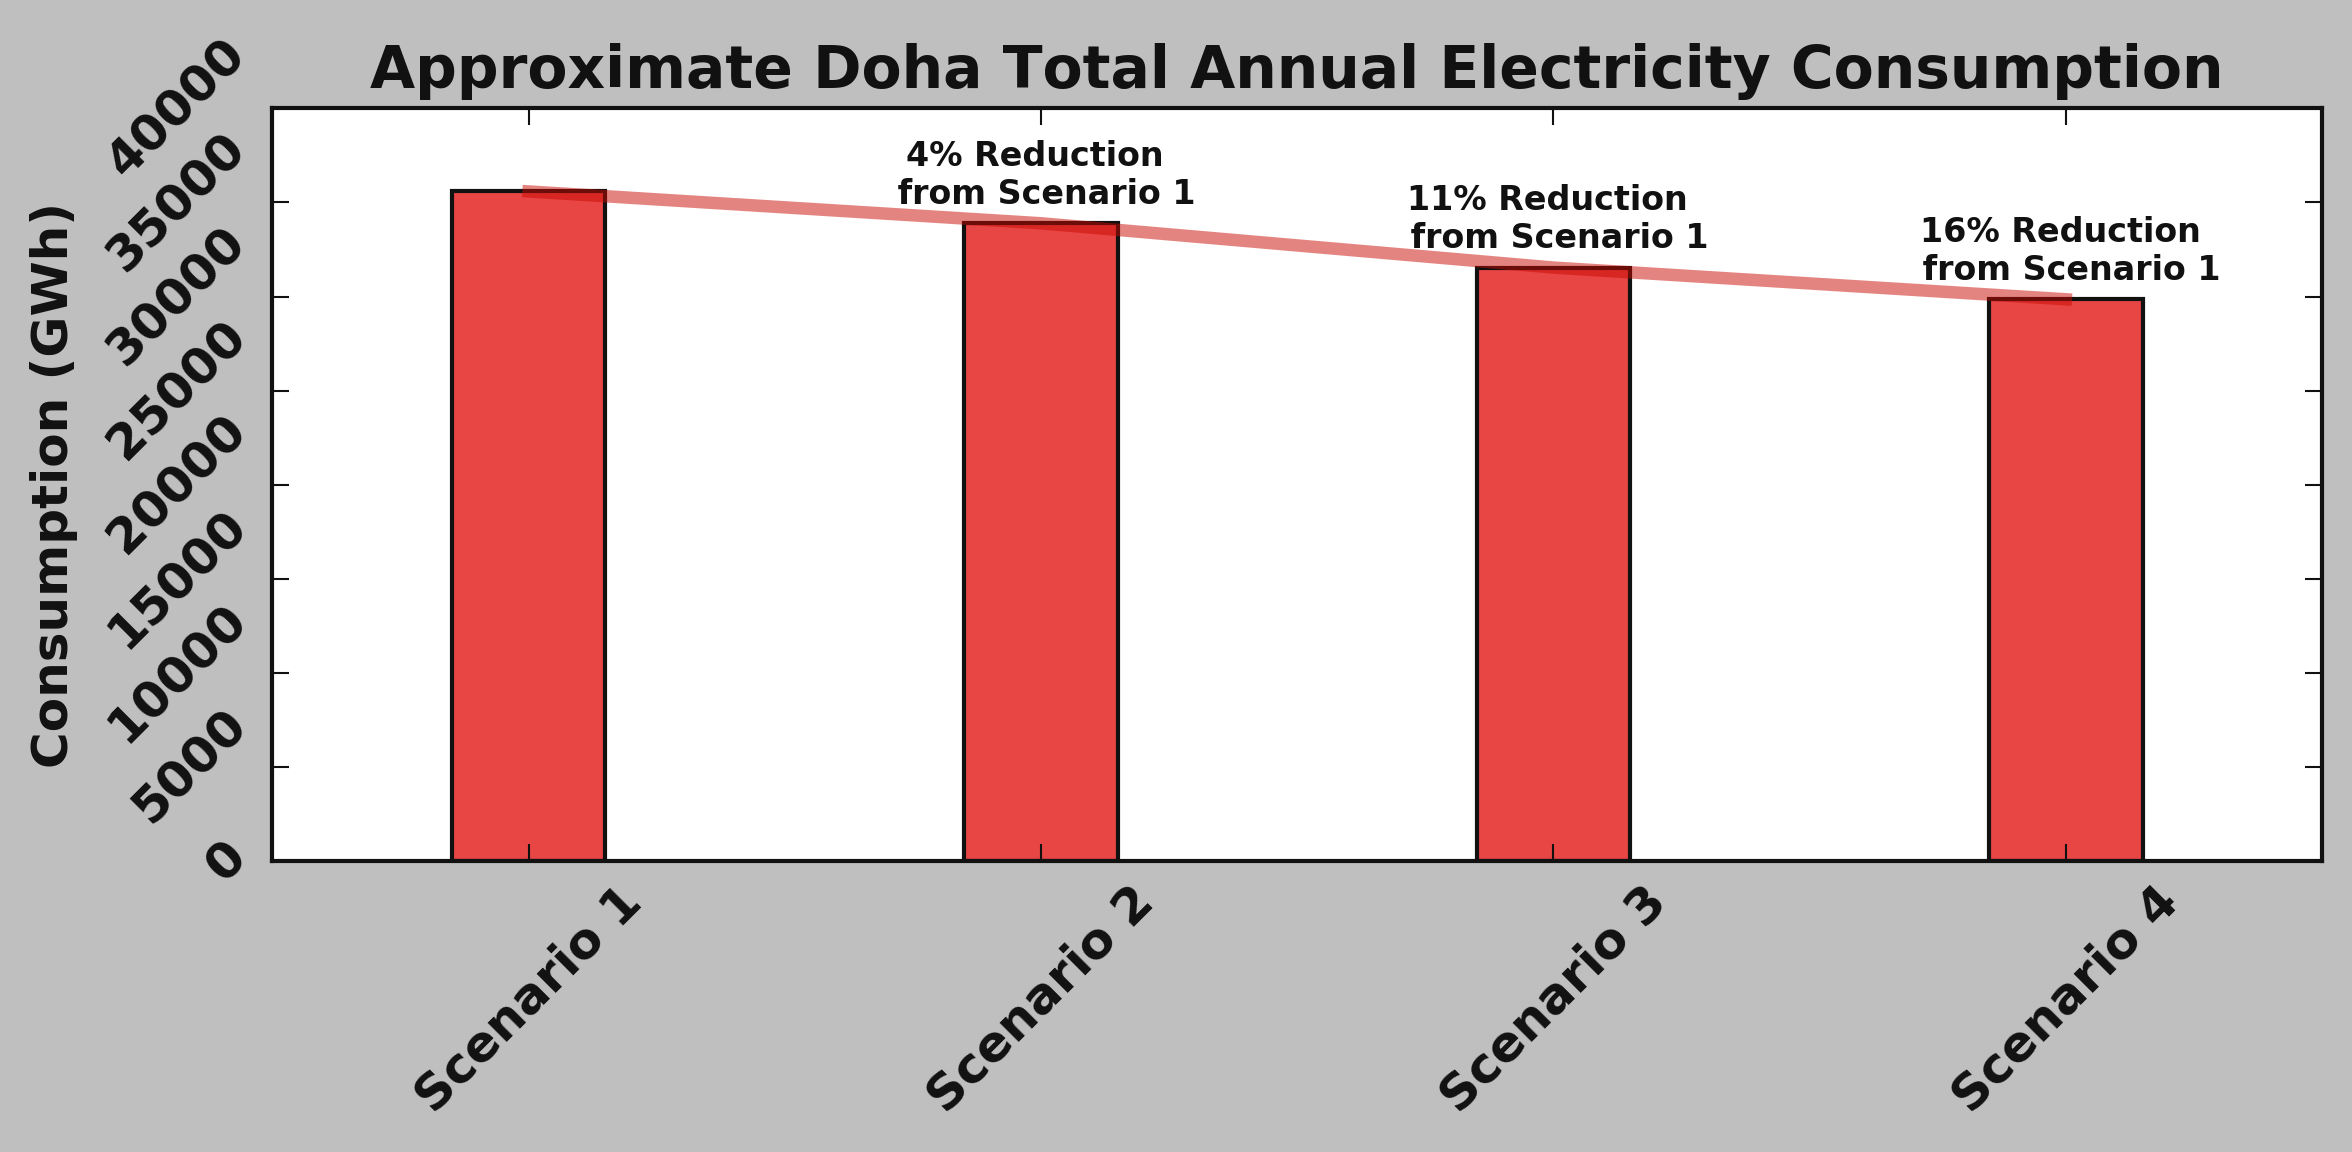

In [114]:
## Plotting Consumptions for the 4 scenarios:
mpl.style.use('classic')
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.weight"] = "bold"
plt.rcParams["font.size"] = 12
plt.rcParams["axes.labelweight"] = "bold"
df = [np.sum(Data_aggregate['consumption_scen1'])/1e3,
     np.sum(Data_aggregate['consumption_scen2']/1e3),
     np.sum(Data_aggregate['consumption_scen3']/1e3),
     np.sum(Data_aggregate['consumption_scen4']/1e3),]
fig, axes = plt.subplots(figsize=(8,4),dpi=300)
labels = ['Scenario 1','Scenario 2','Scenario 3','Scenario 4']
width = 0.3
x = (labels)
rects1 = axes.bar(x, df, width, color="#E84545")
axes.plot(x, df, linewidth=3,color="r",alpha=0.5)
axes.set_title('Approximate Doha Total Annual Electricity Consumption',size=14,fontweight='bold')
axes.set_ylabel('Consumption (GWh)')
axes.tick_params(axis='both',labelrotation=45)
axes.set_xticklabels(labels)
axes.set_xlim([-0.5, 3.5])
#axes.set_ylim([0, 4000])

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for i, rect in enumerate(rects):
        height = rect.get_height()
        if i != 0:
            axes.annotate('{}% Reduction \n from Scenario 1'.format(int((df[0]-df[i])/df[0] * 100)),
                                                 xy=(rect.get_x() + rect.get_width() / 2, height),
                                                 xytext=(0, 3),  # 3 points vertical offset
                                                 textcoords="offset points",
                                                 ha='center', va='bottom', size=8)

autolabel(rects1)
plt.savefig('Figure16.jpeg', dpi=300, bbox_inches="tight", pad_inches= 0)
fig.tight_layout()
plt.show()